In [1]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [9,13,1,8,12,0,11,15,6,10,14,5]
filenames

['result_16_1_init_5e3.json',
 'result_16_1_init_5e3_full.json',
 'result_16_2_init_15e3_full.json',
 'result_16_2_init_15e3_full_reverse.json',
 'result_16_2_init_2e3_full.json',
 'result_16_2_init_5e3.json',
 'result_16_2_init_5e3_full.json',
 'result_16_2_init_5e3_full_reverse.json',
 'result_4_1_init_5e3.json',
 'result_4_1_init_5e3_full.json',
 'result_4_2_init_5e3.json',
 'result_4_2_init_5e3_full.json',
 'result_8_1_init_5e3.json',
 'result_8_1_init_5e3_full.json',
 'result_8_2_init_5e3.json',
 'result_8_2_init_5e3_full.json']

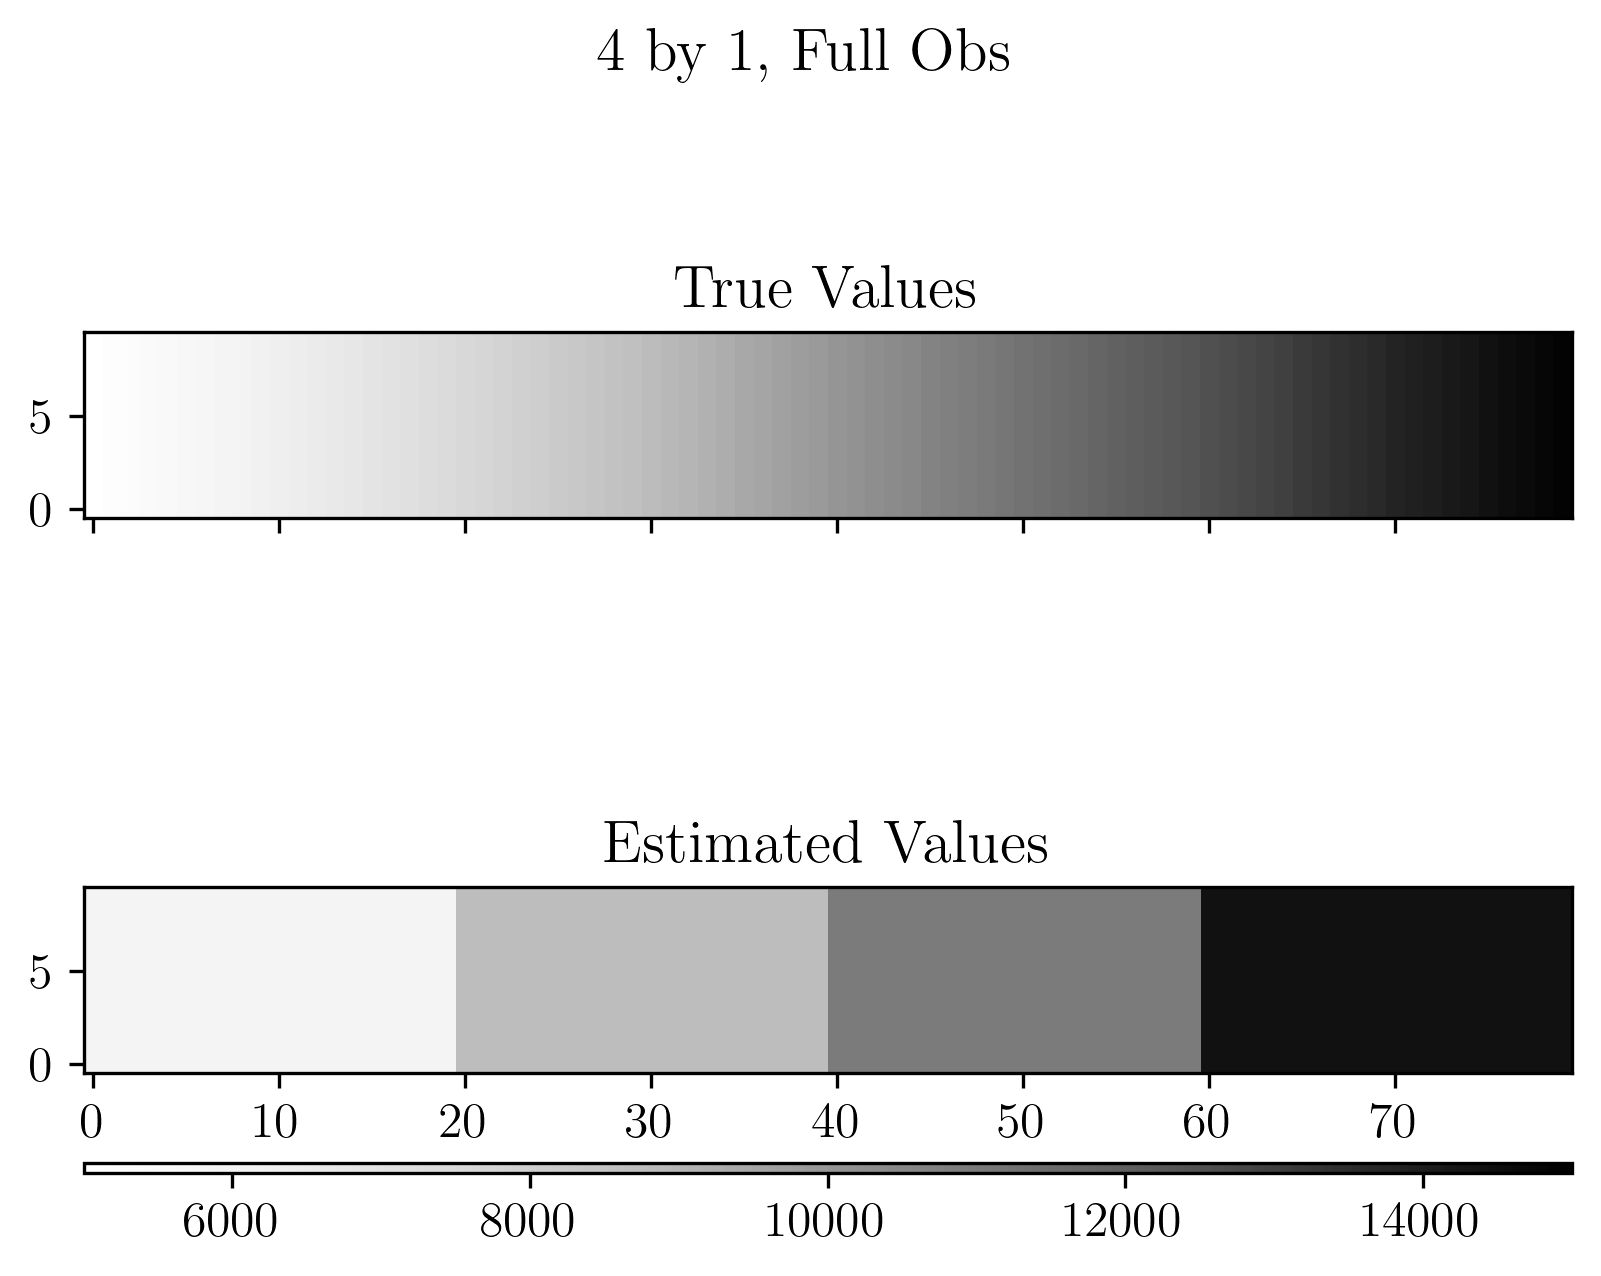

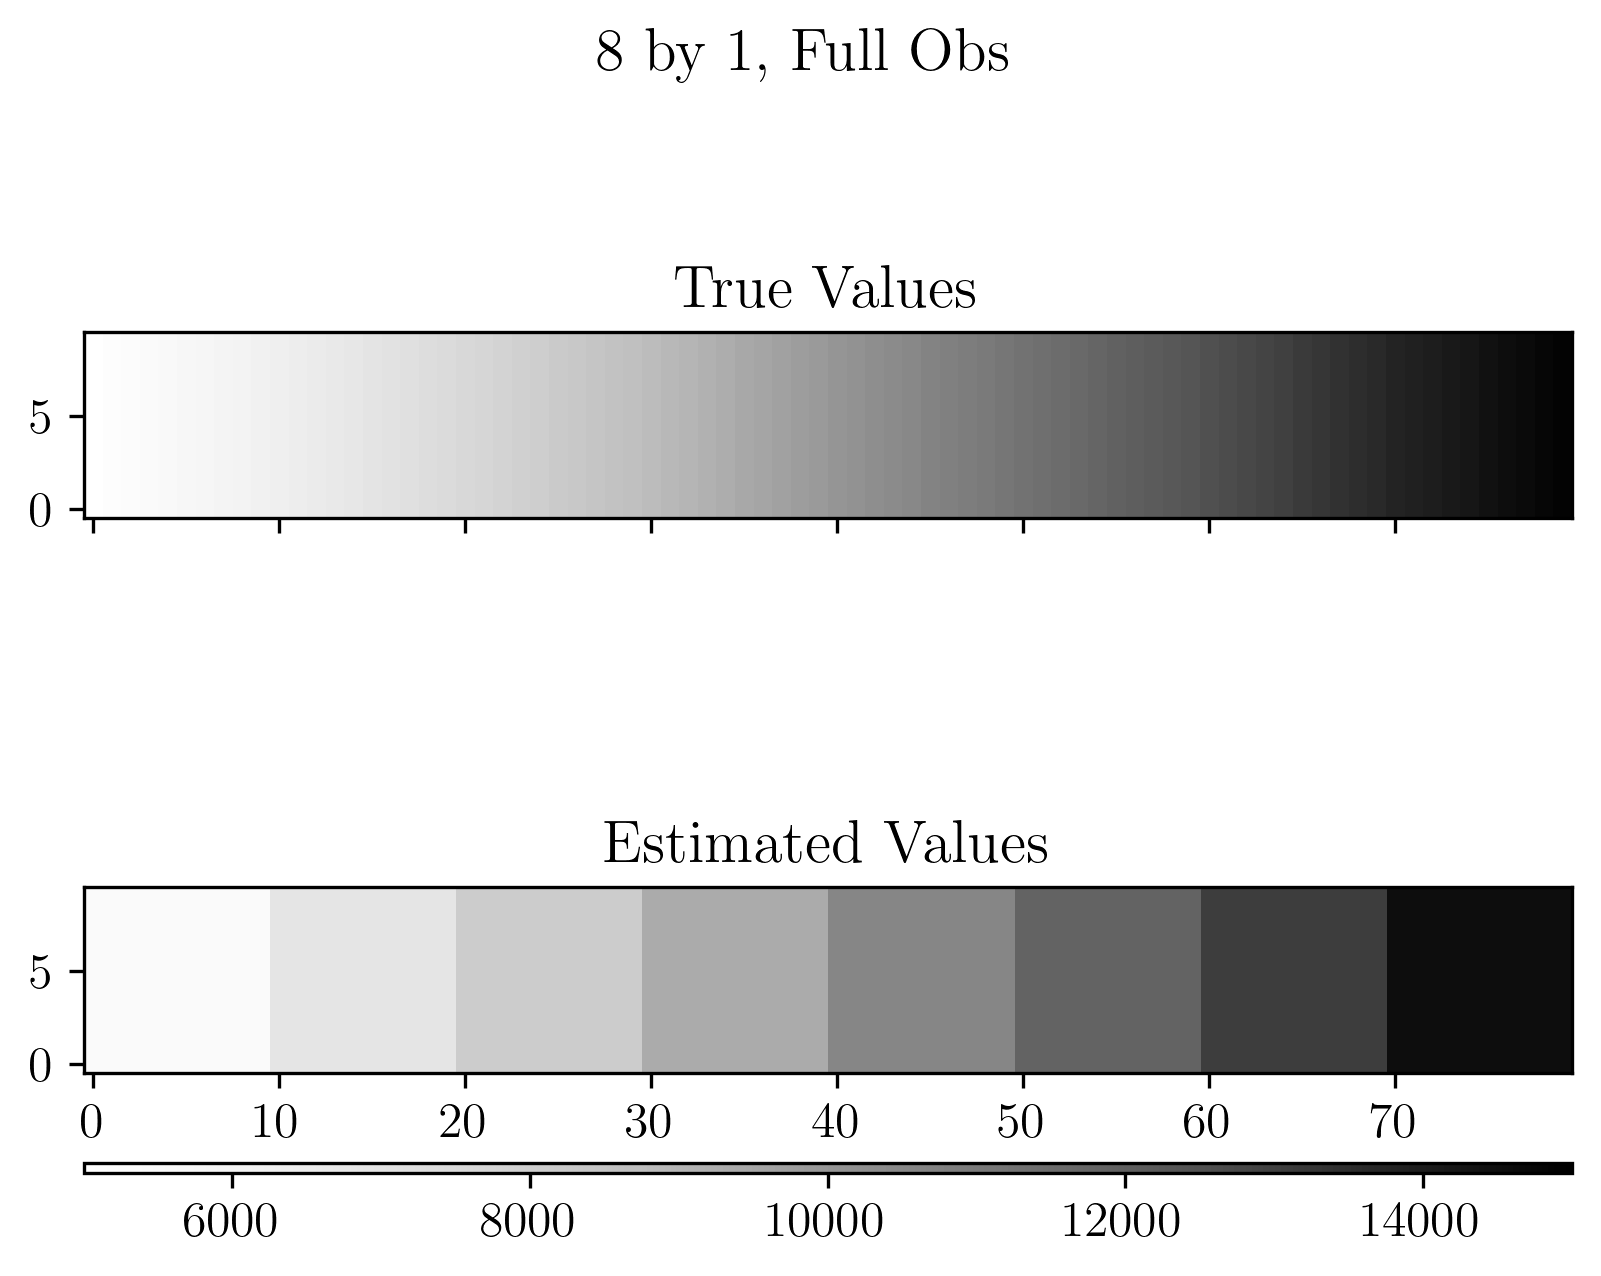

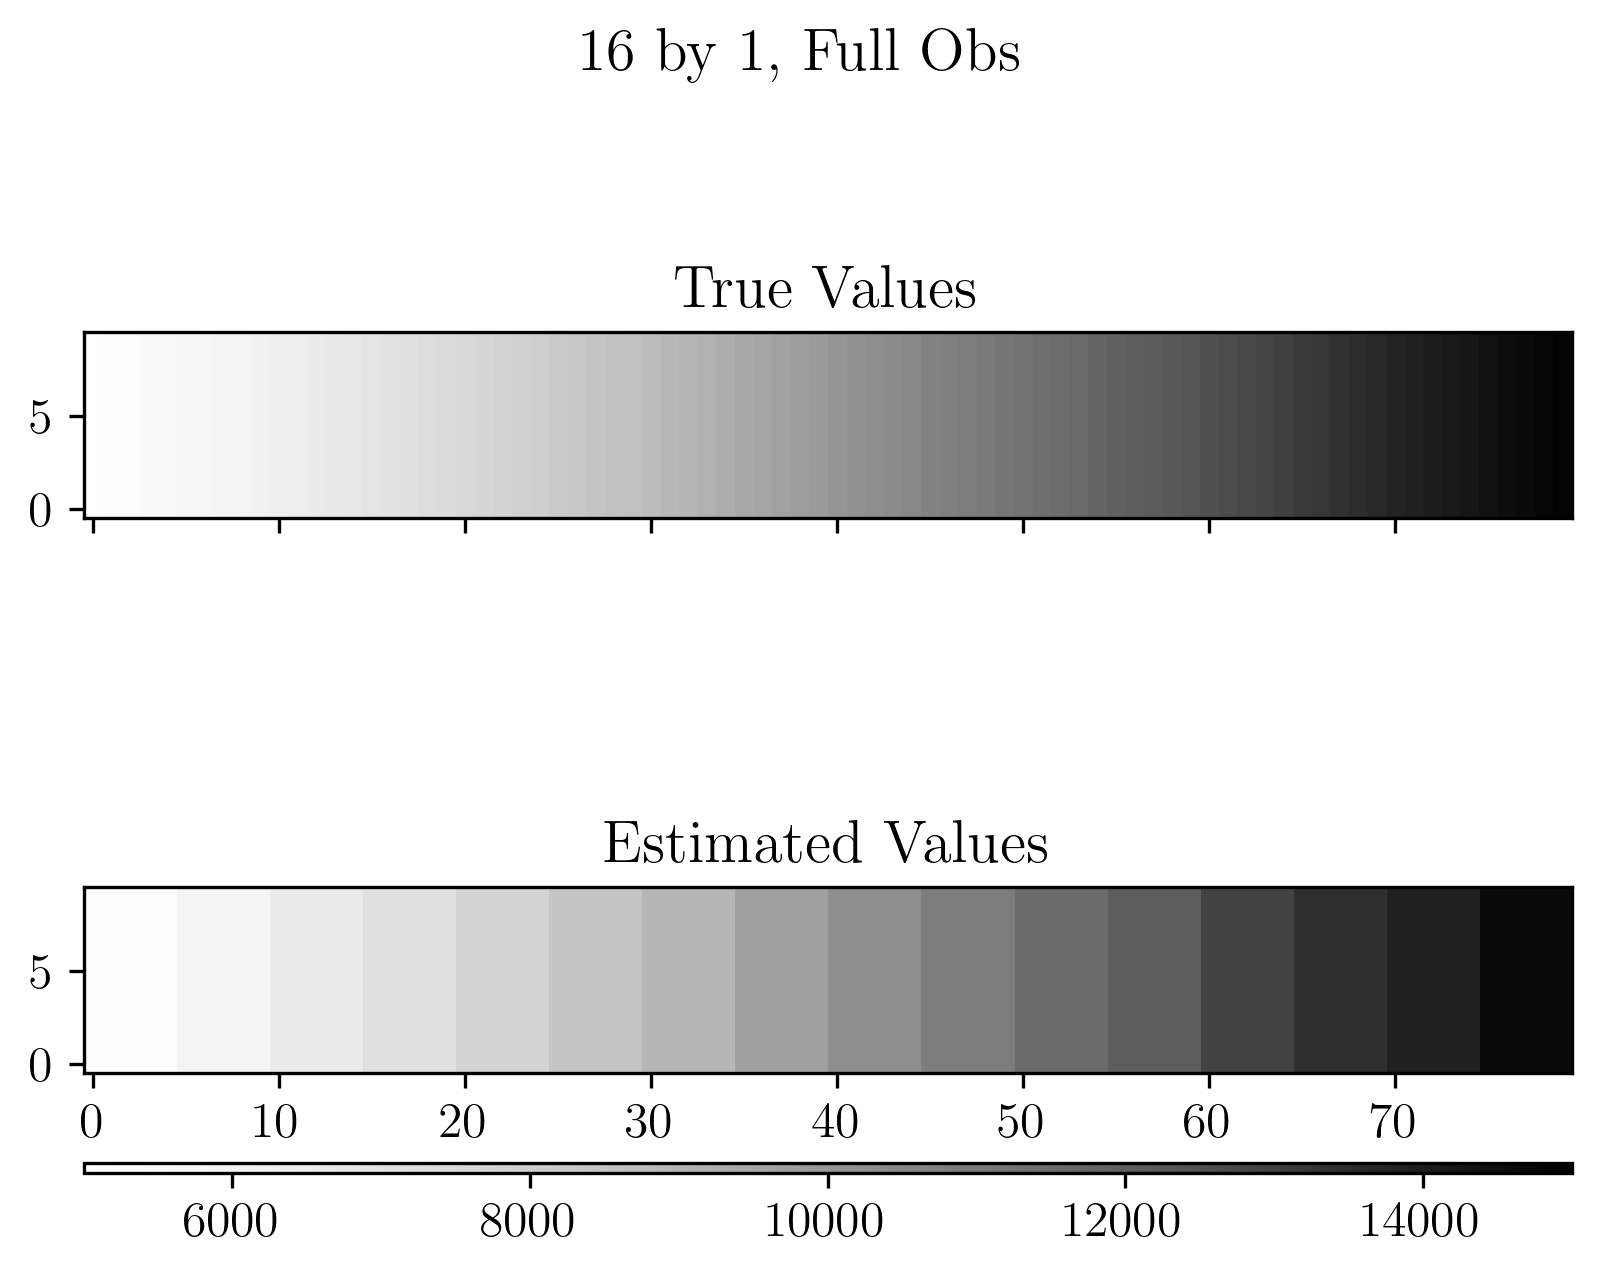

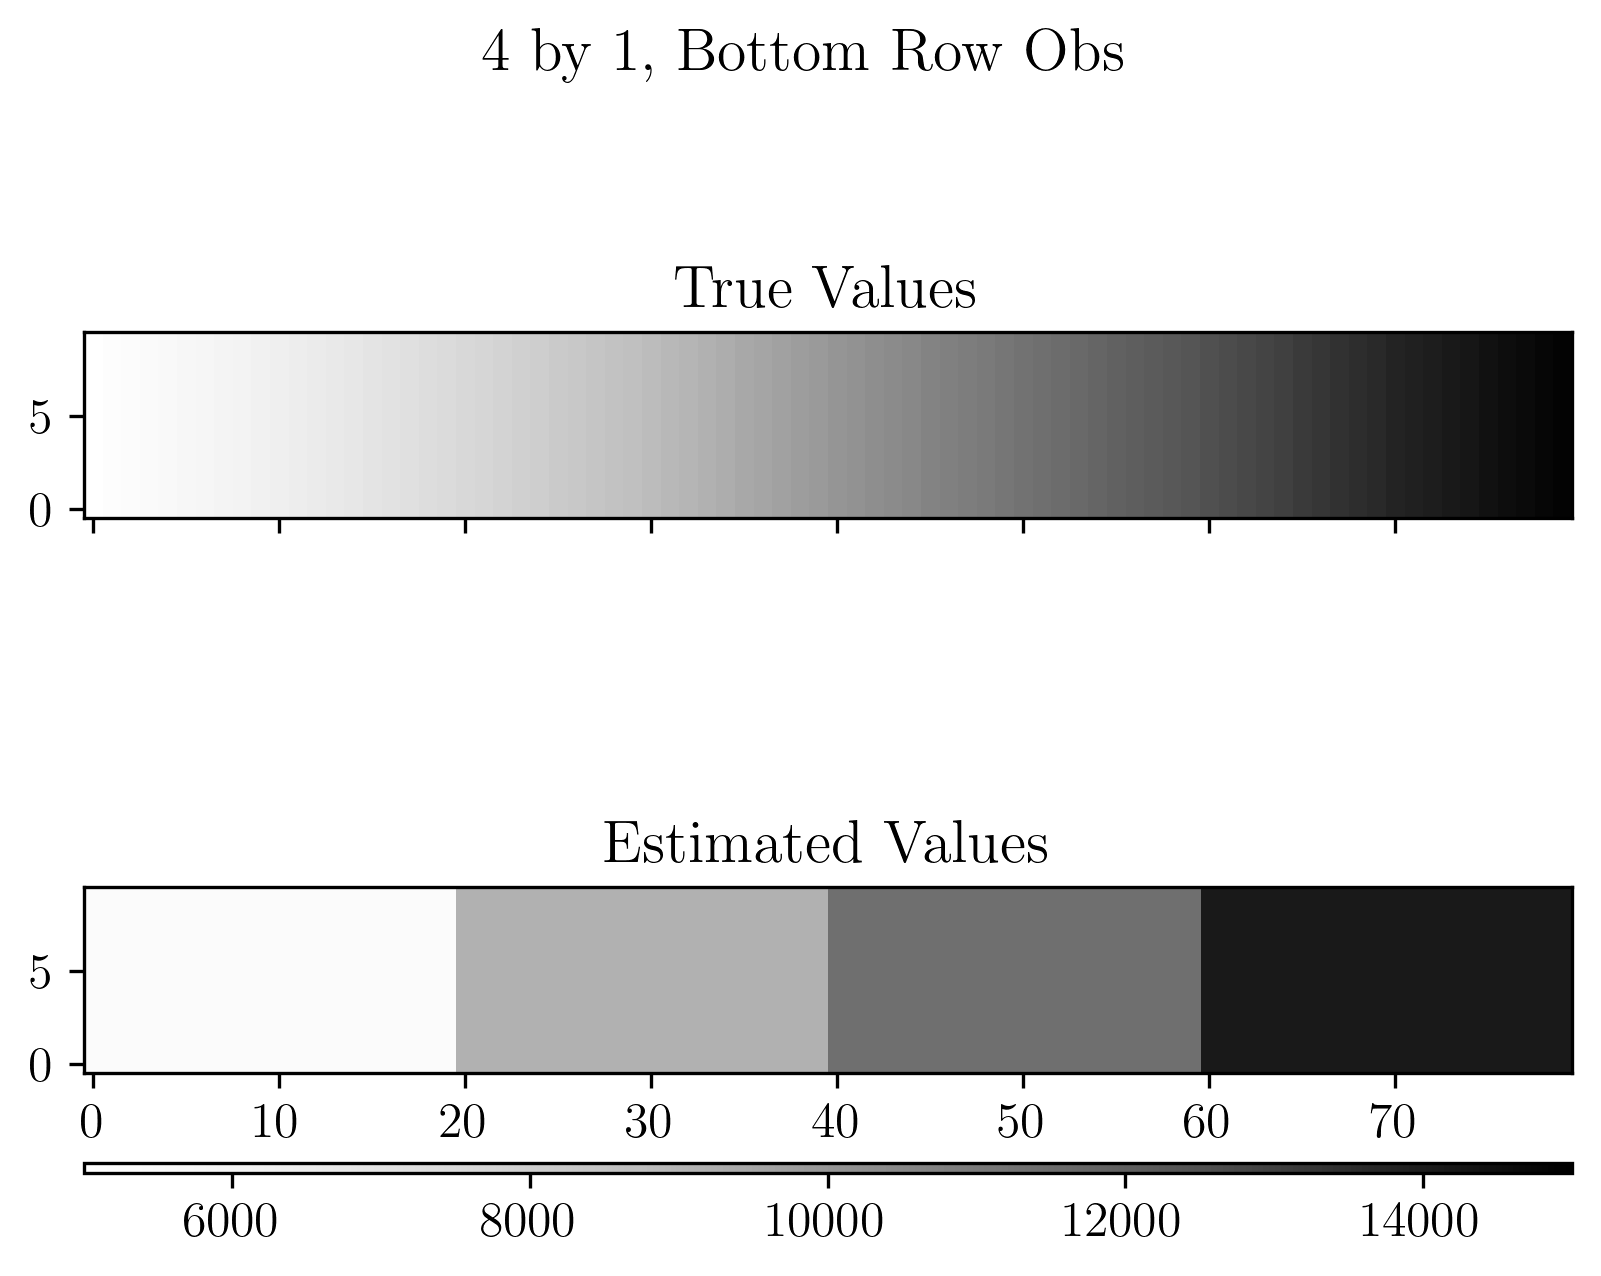

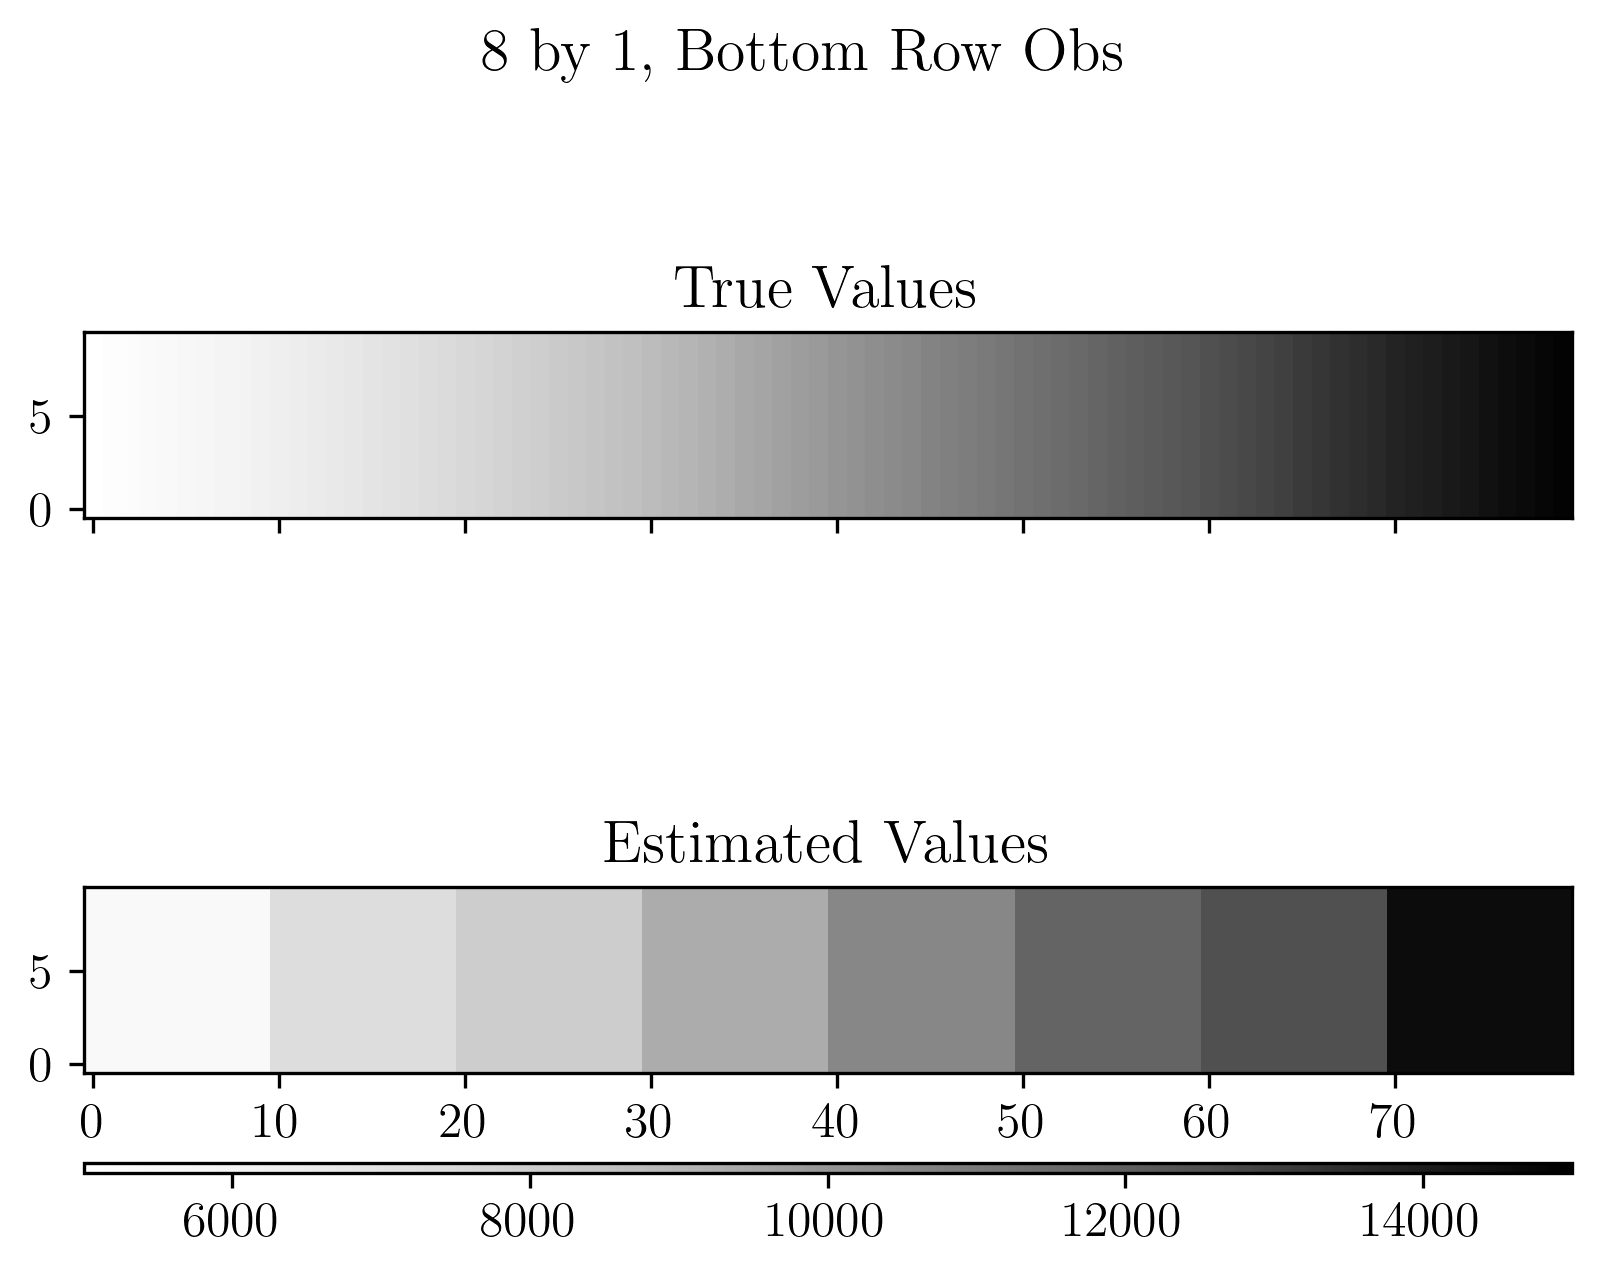

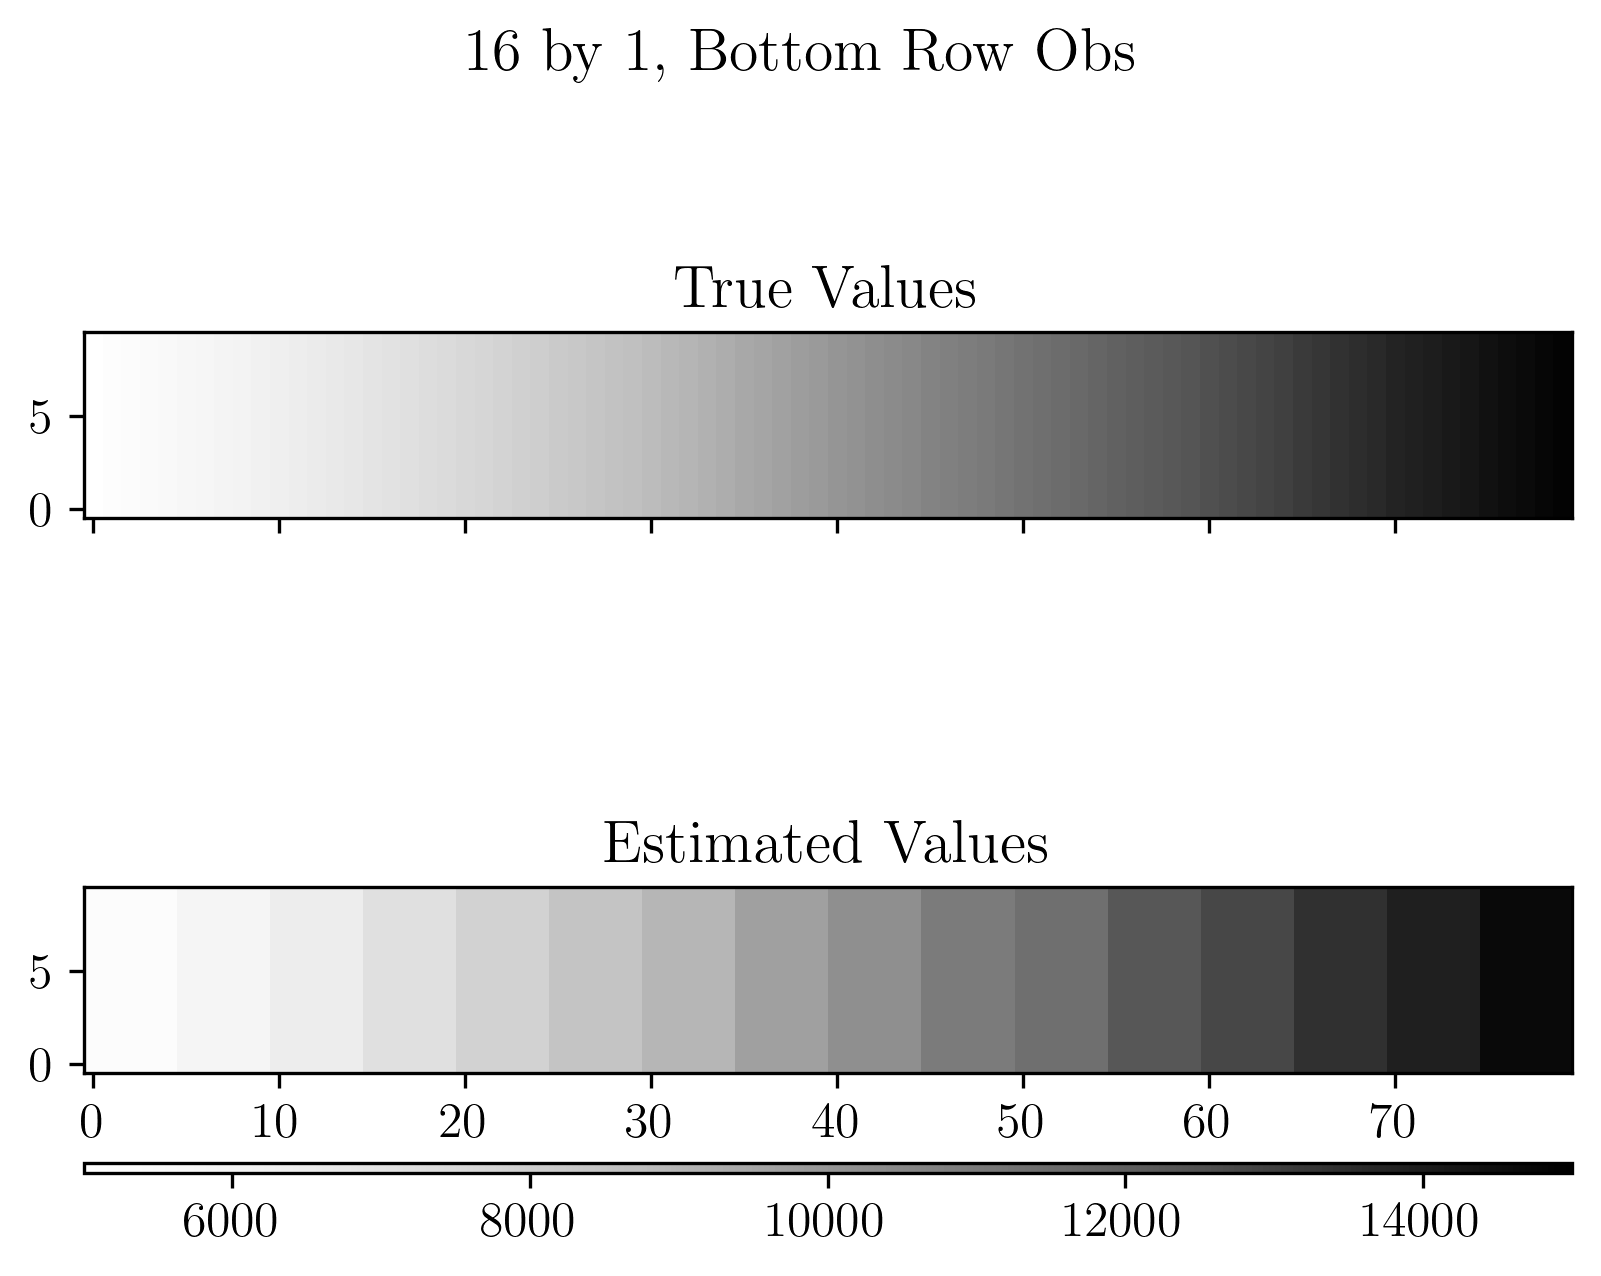

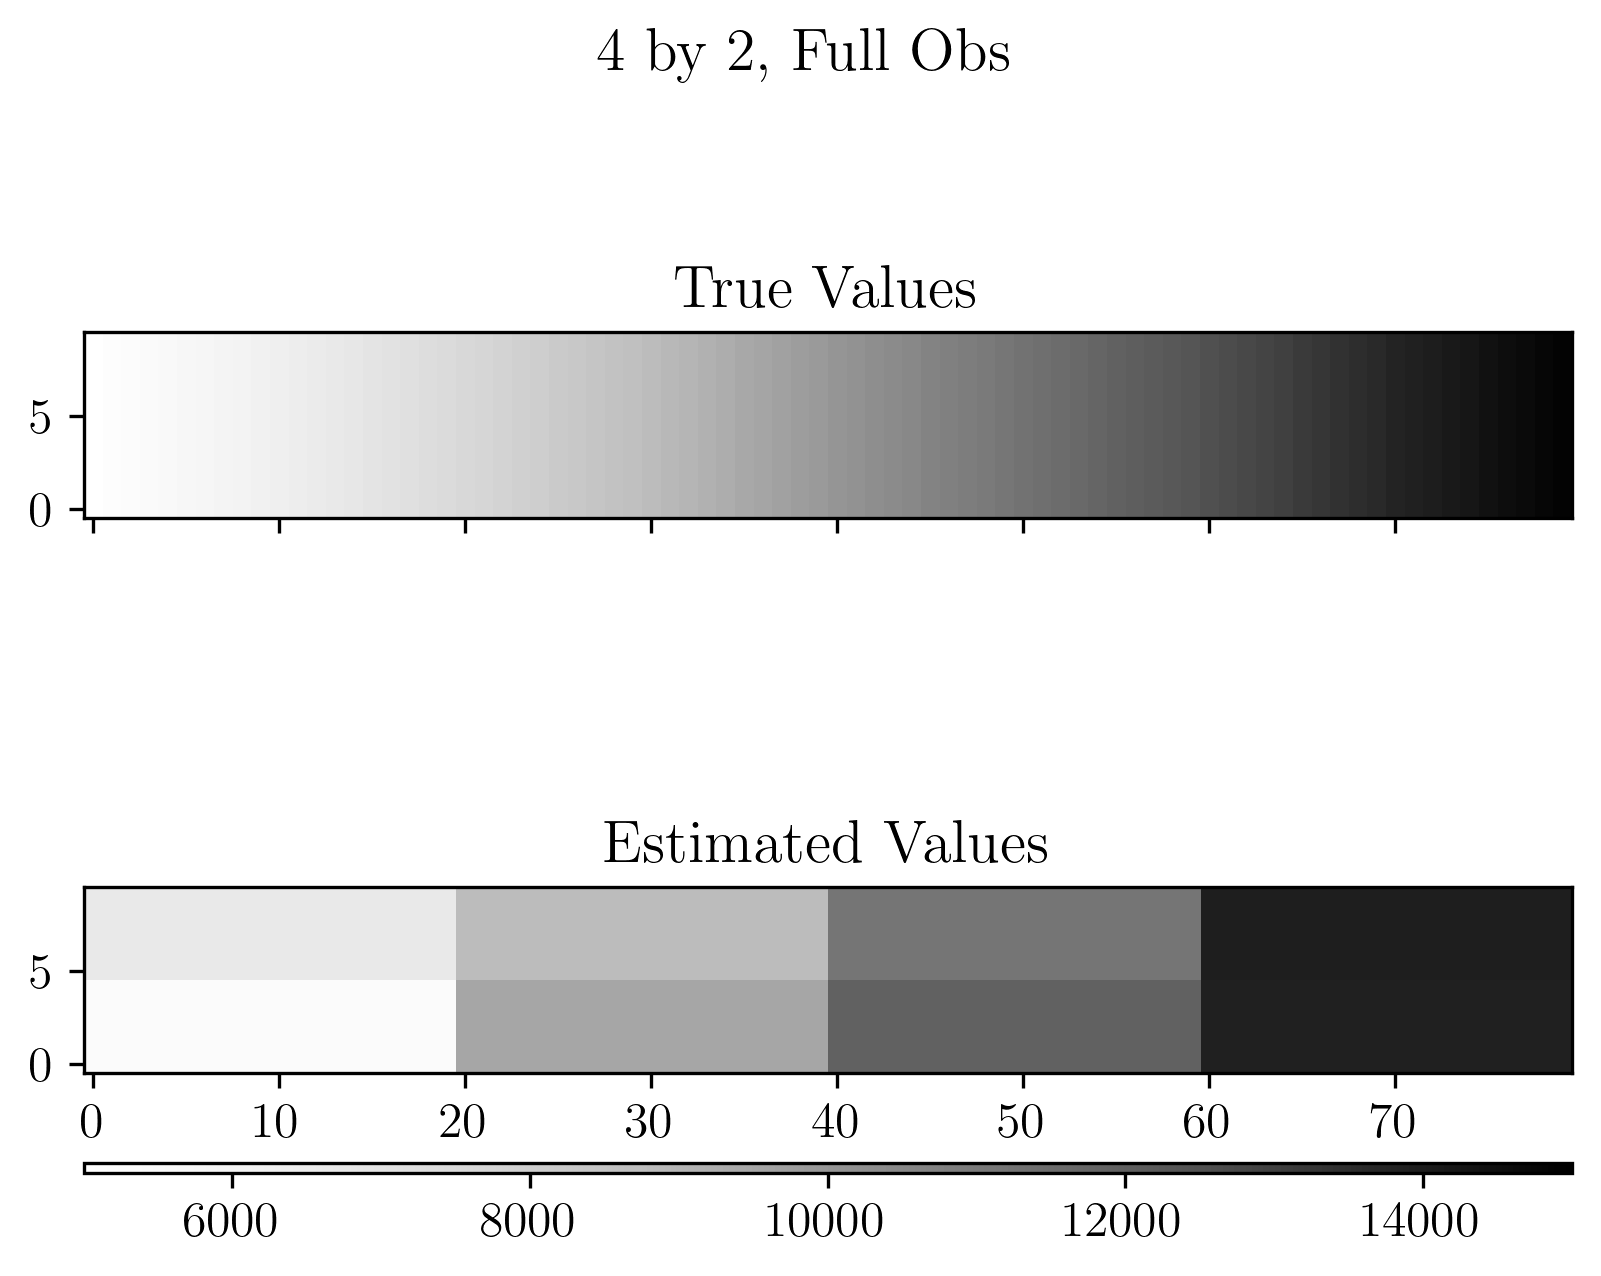

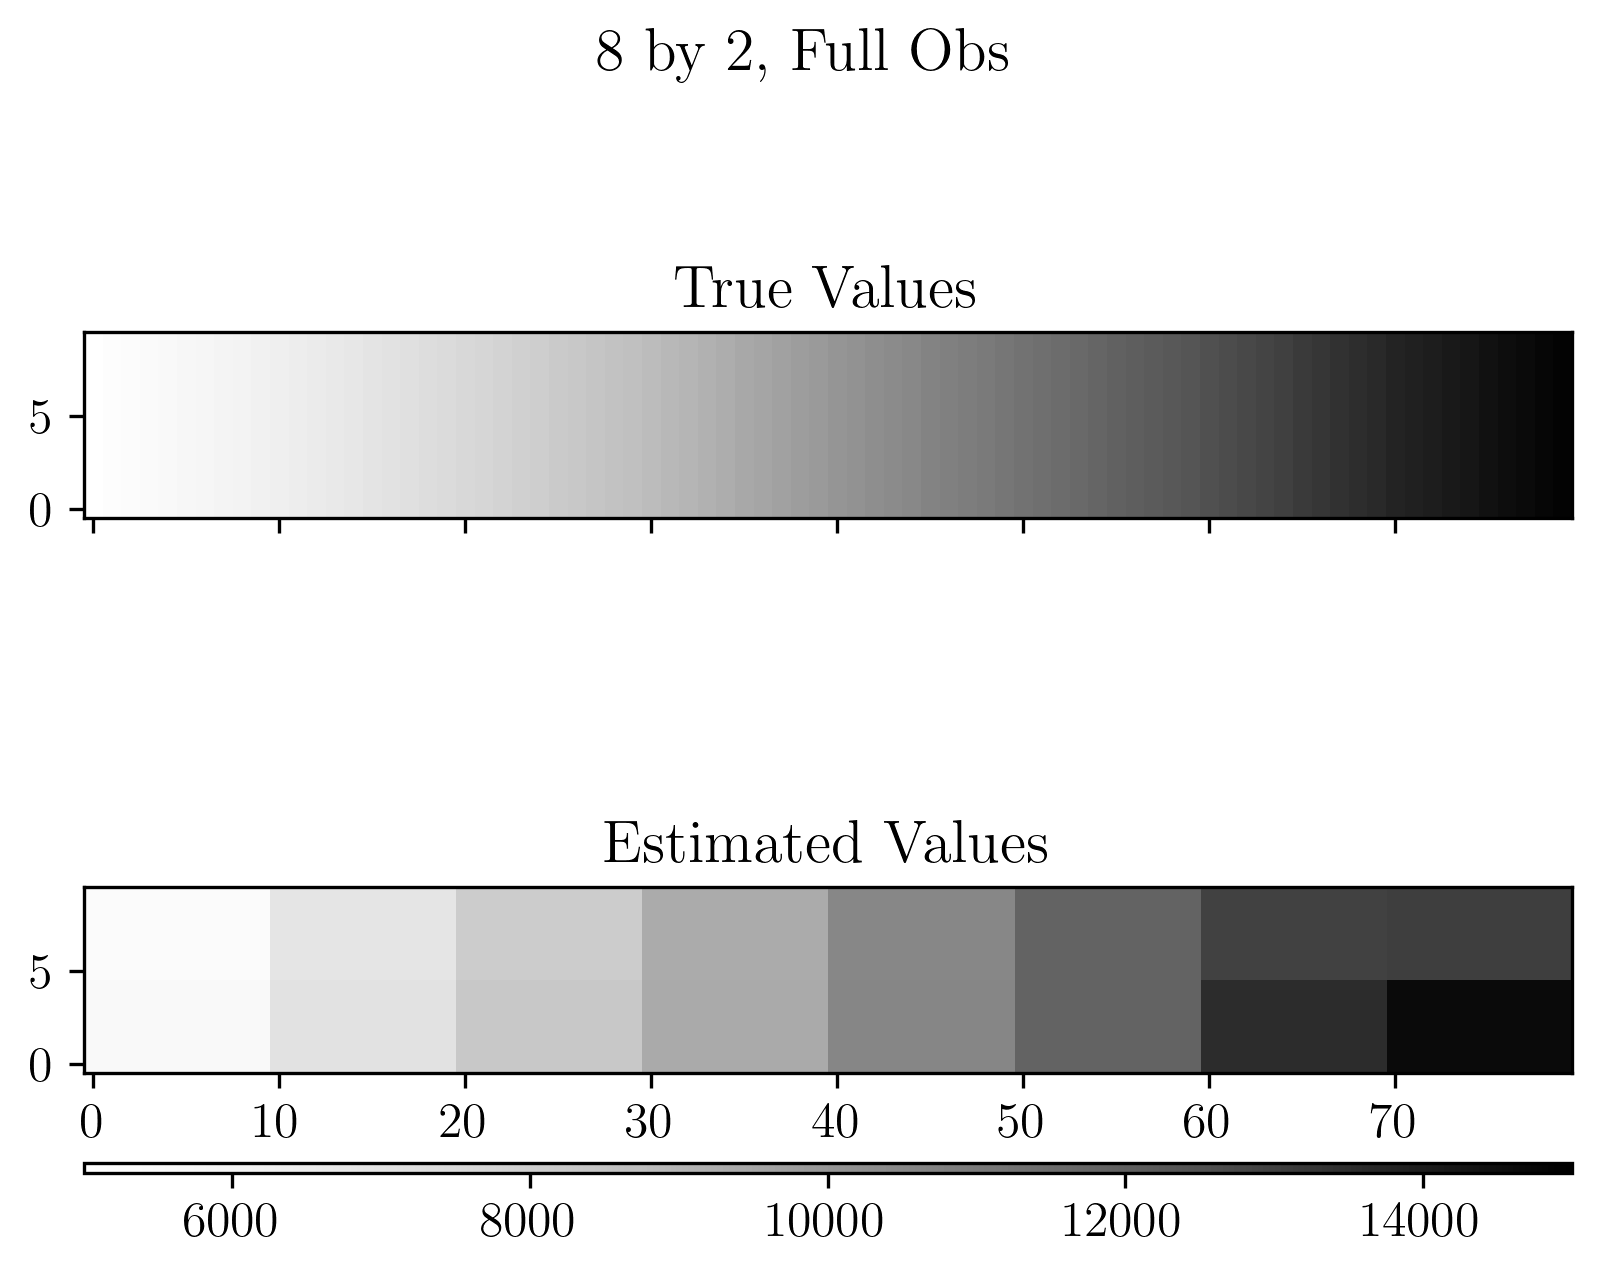

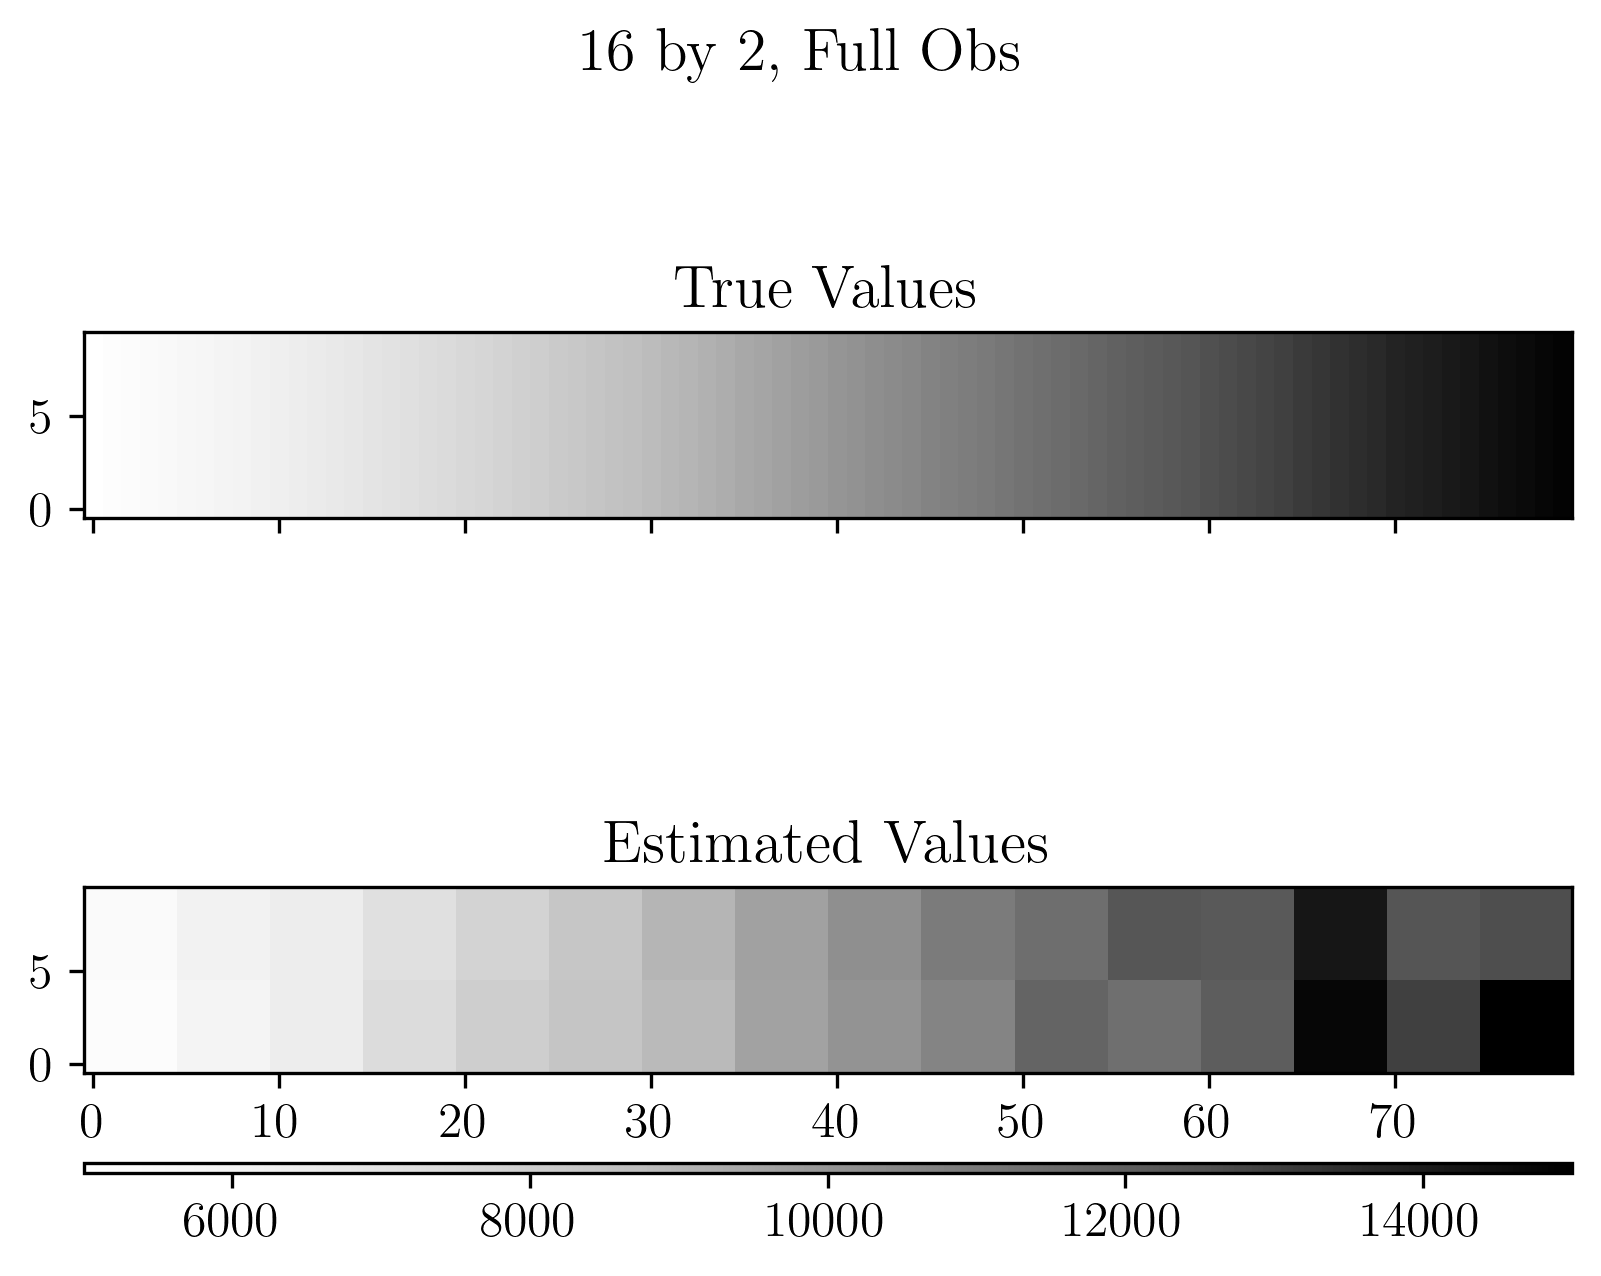

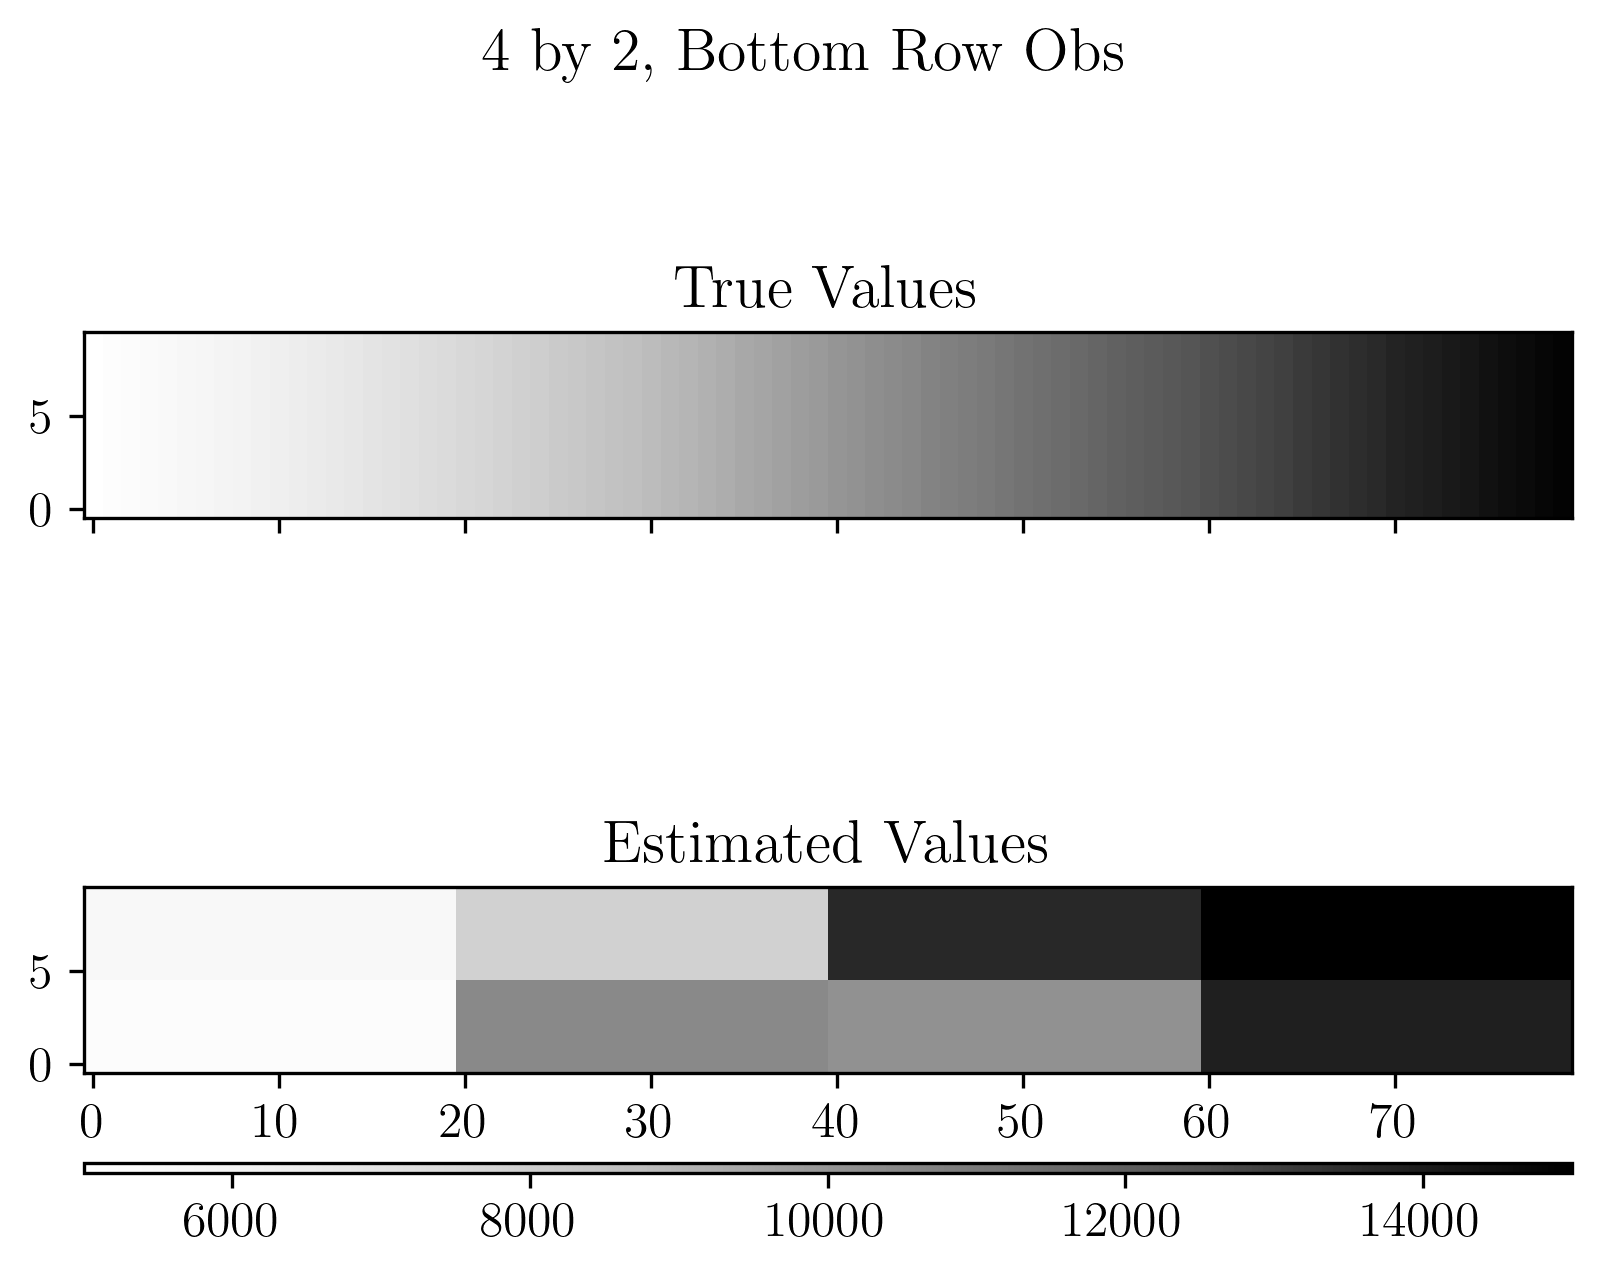

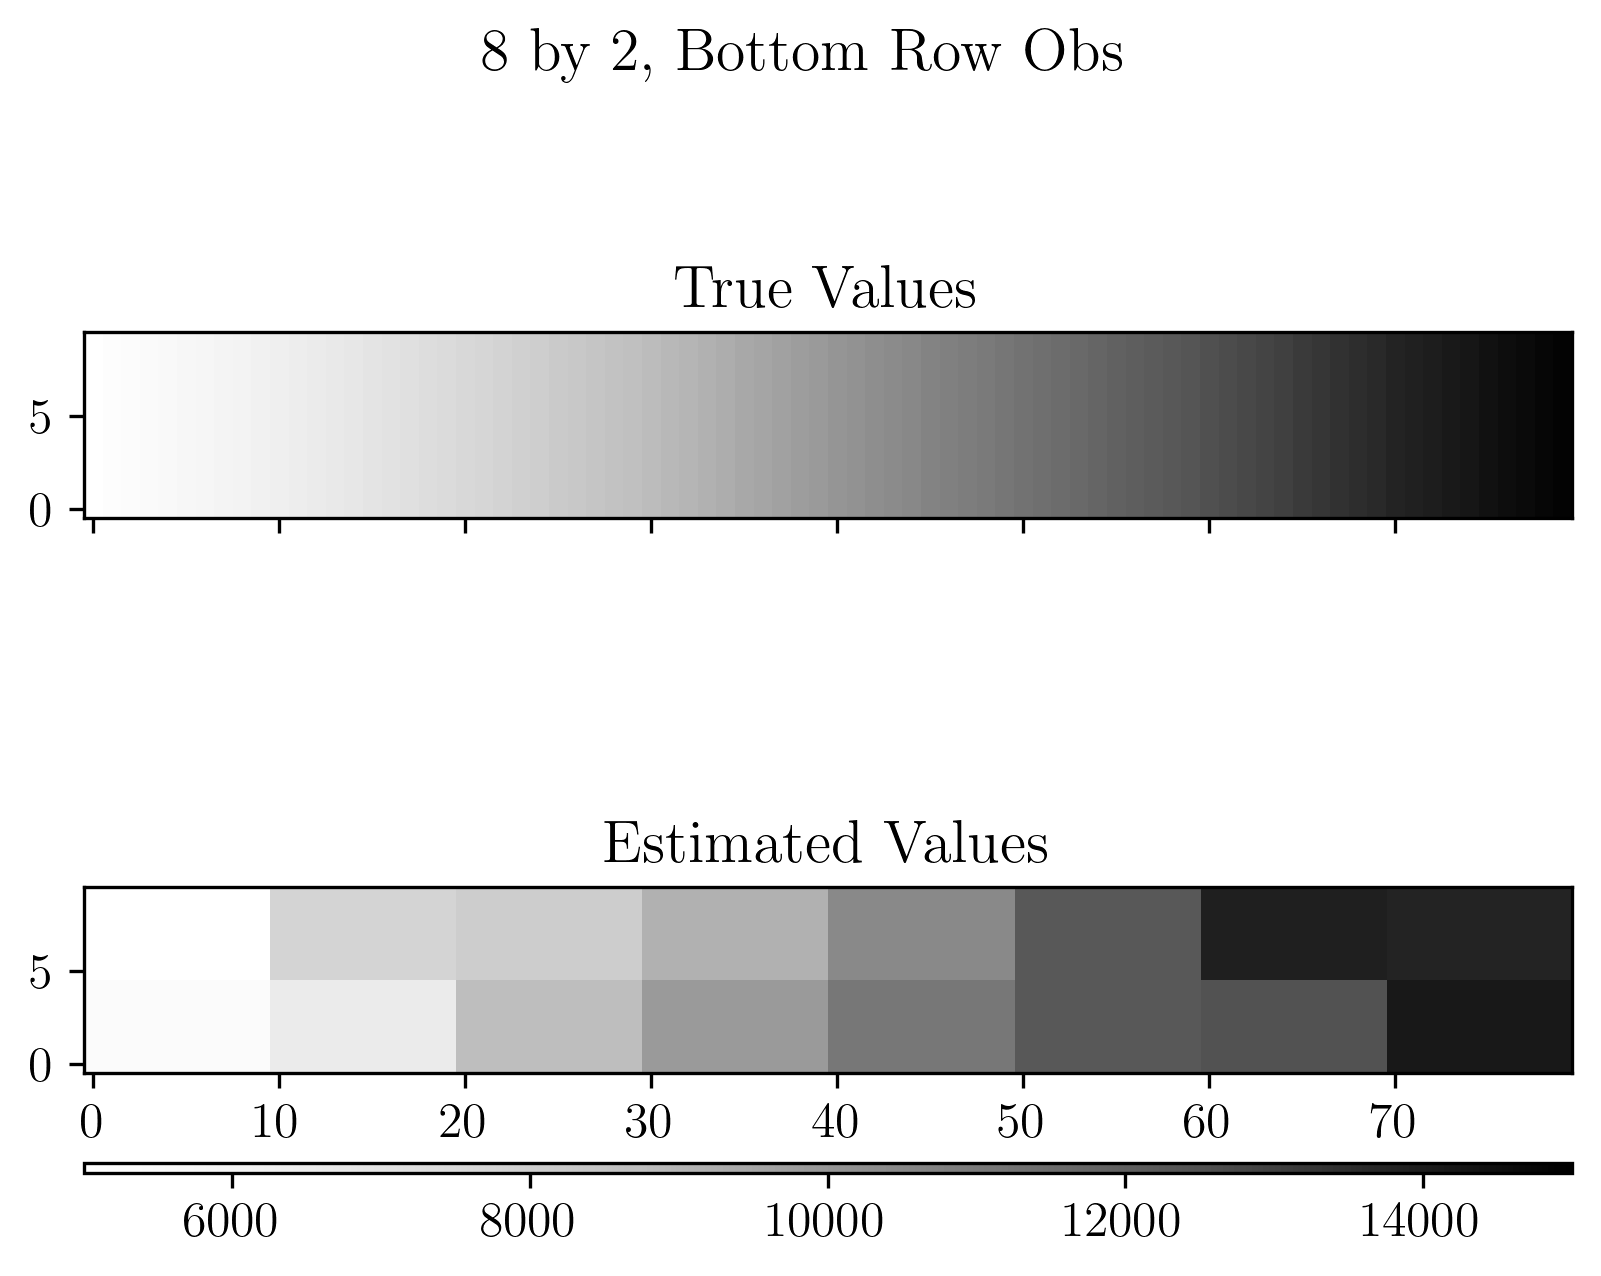

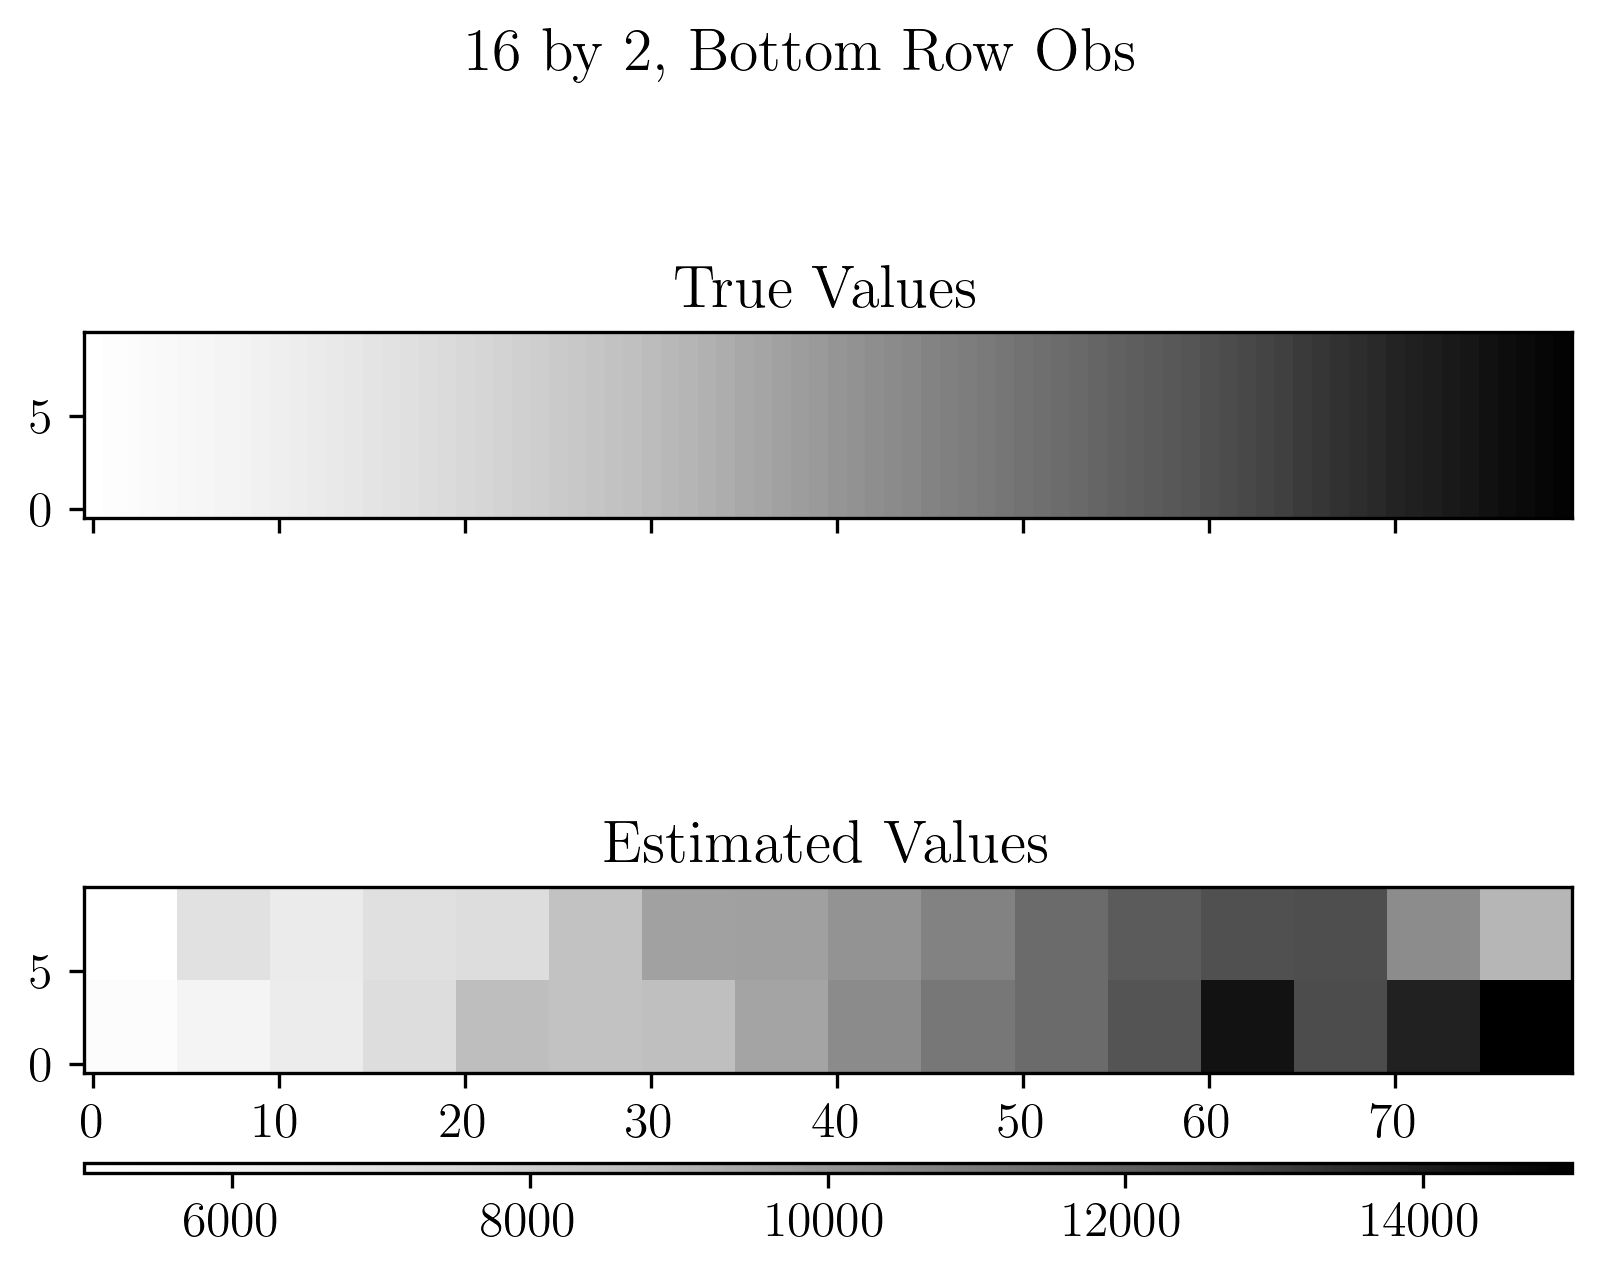

In [1]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [9,13,1,8,12,0,11,15,6,10,14,5]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    n_plots = 2
    fig, axs = plt.subplots(n_plots, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs)
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    if n_plots == 2:
        pad = 0.3
    else:
        pad = 0.1
    cax1 = divider1.append_axes("bottom", size="5%", pad=pad)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    if n_plots == 3:
        im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
        axs[2].set_title('Absolute Relative Error')
        divider2 = make_axes_locatable(axs[2])
        cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
        fig.colorbar(im2, cax=cax2, orientation='horizontal')
        plt.show()
    

    


In [3]:
filenames_reordered

['result_4_1_init_5e3_full.json',
 'result_8_1_init_5e3_full.json',
 'result_16_1_init_5e3_full.json',
 'result_4_1_init_5e3.json',
 'result_8_1_init_5e3.json',
 'result_16_1_init_5e3.json',
 'result_4_2_init_5e3_full.json',
 'result_8_2_init_5e3_full.json',
 'result_16_2_init_5e3_full.json',
 'result_4_2_init_5e3.json',
 'result_8_2_init_5e3.json',
 'result_16_2_init_5e3.json']

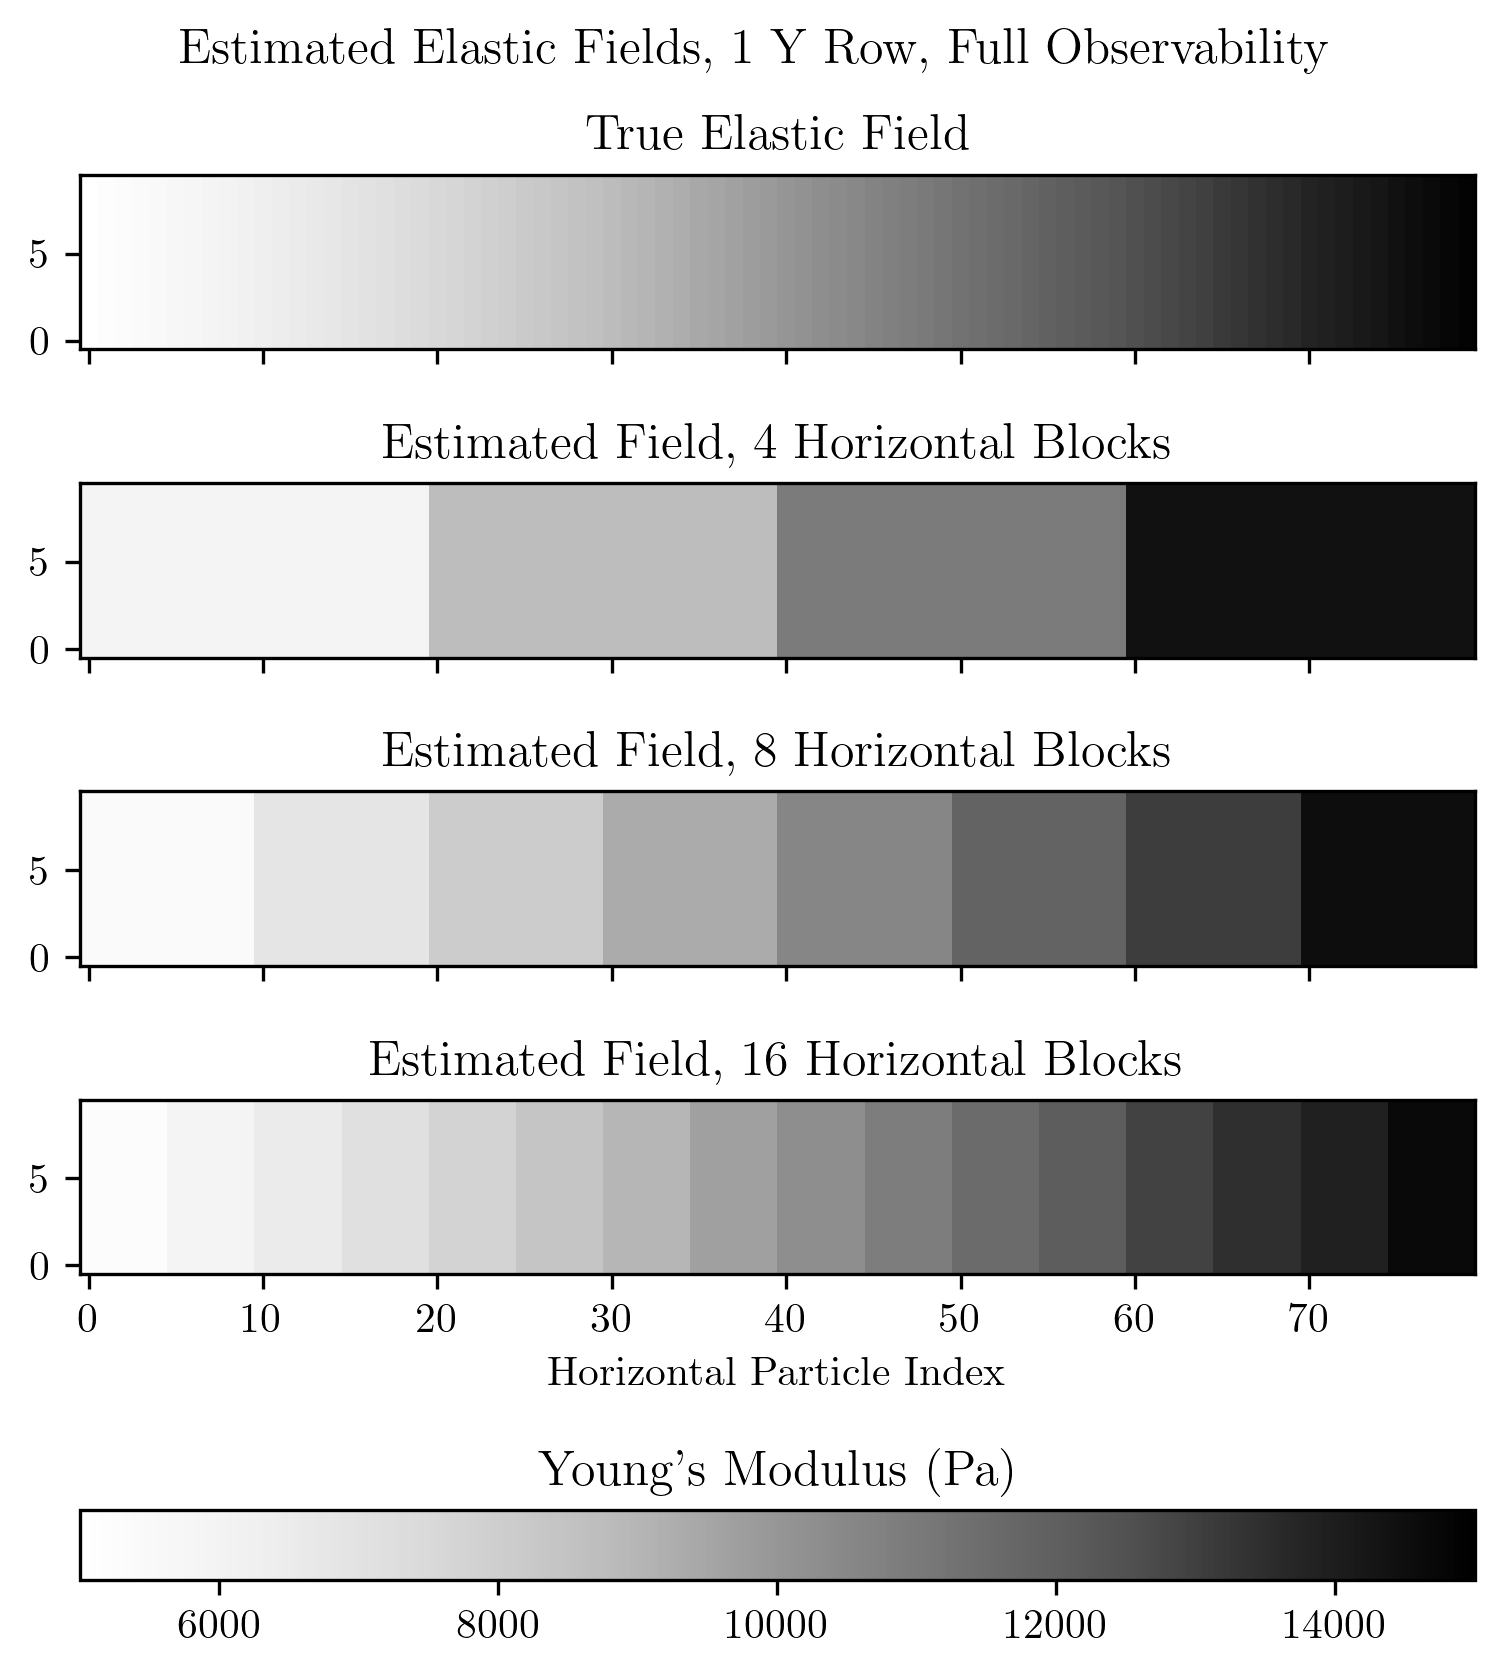

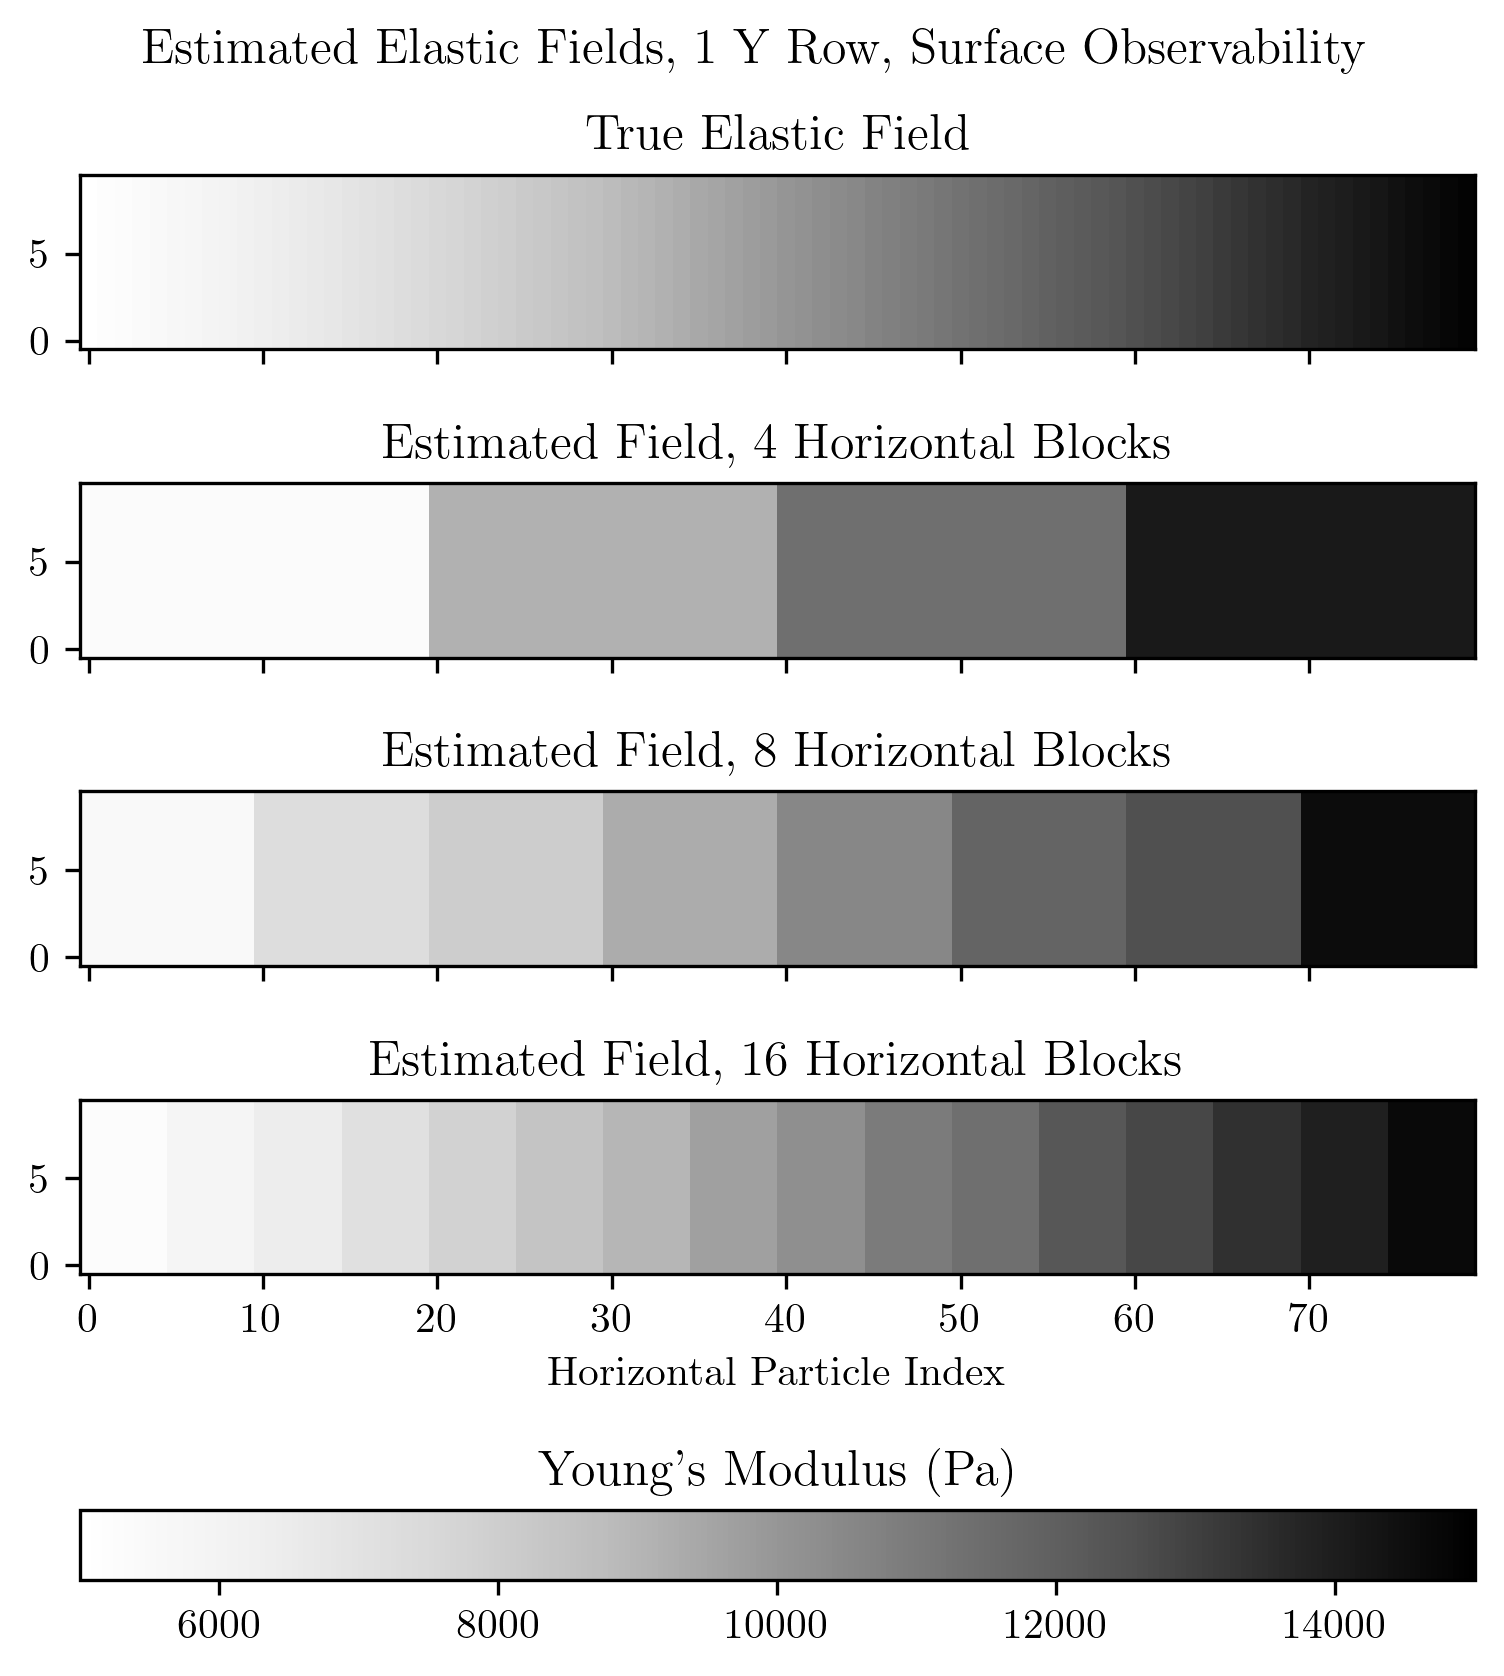

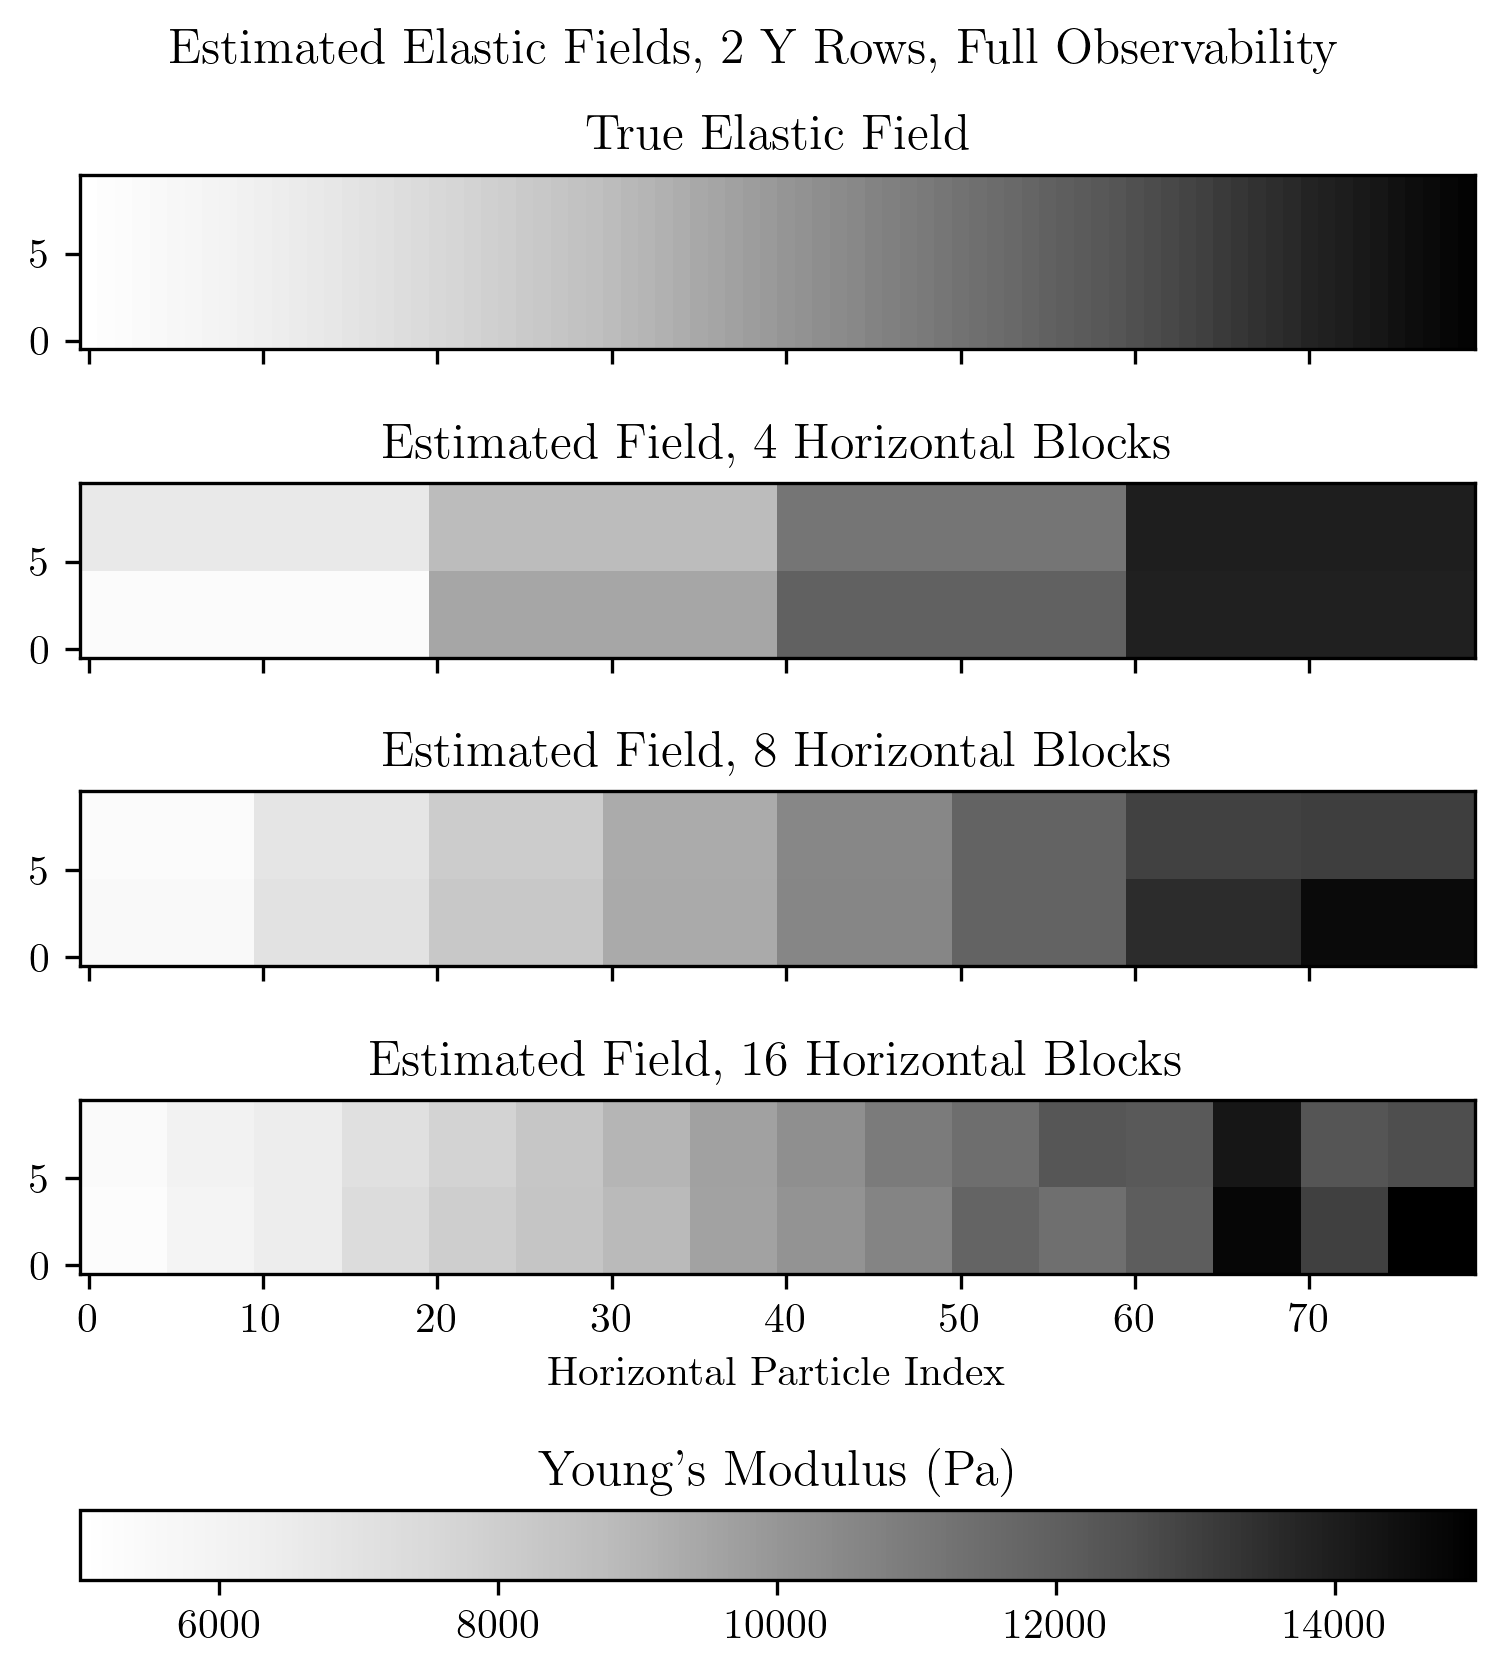

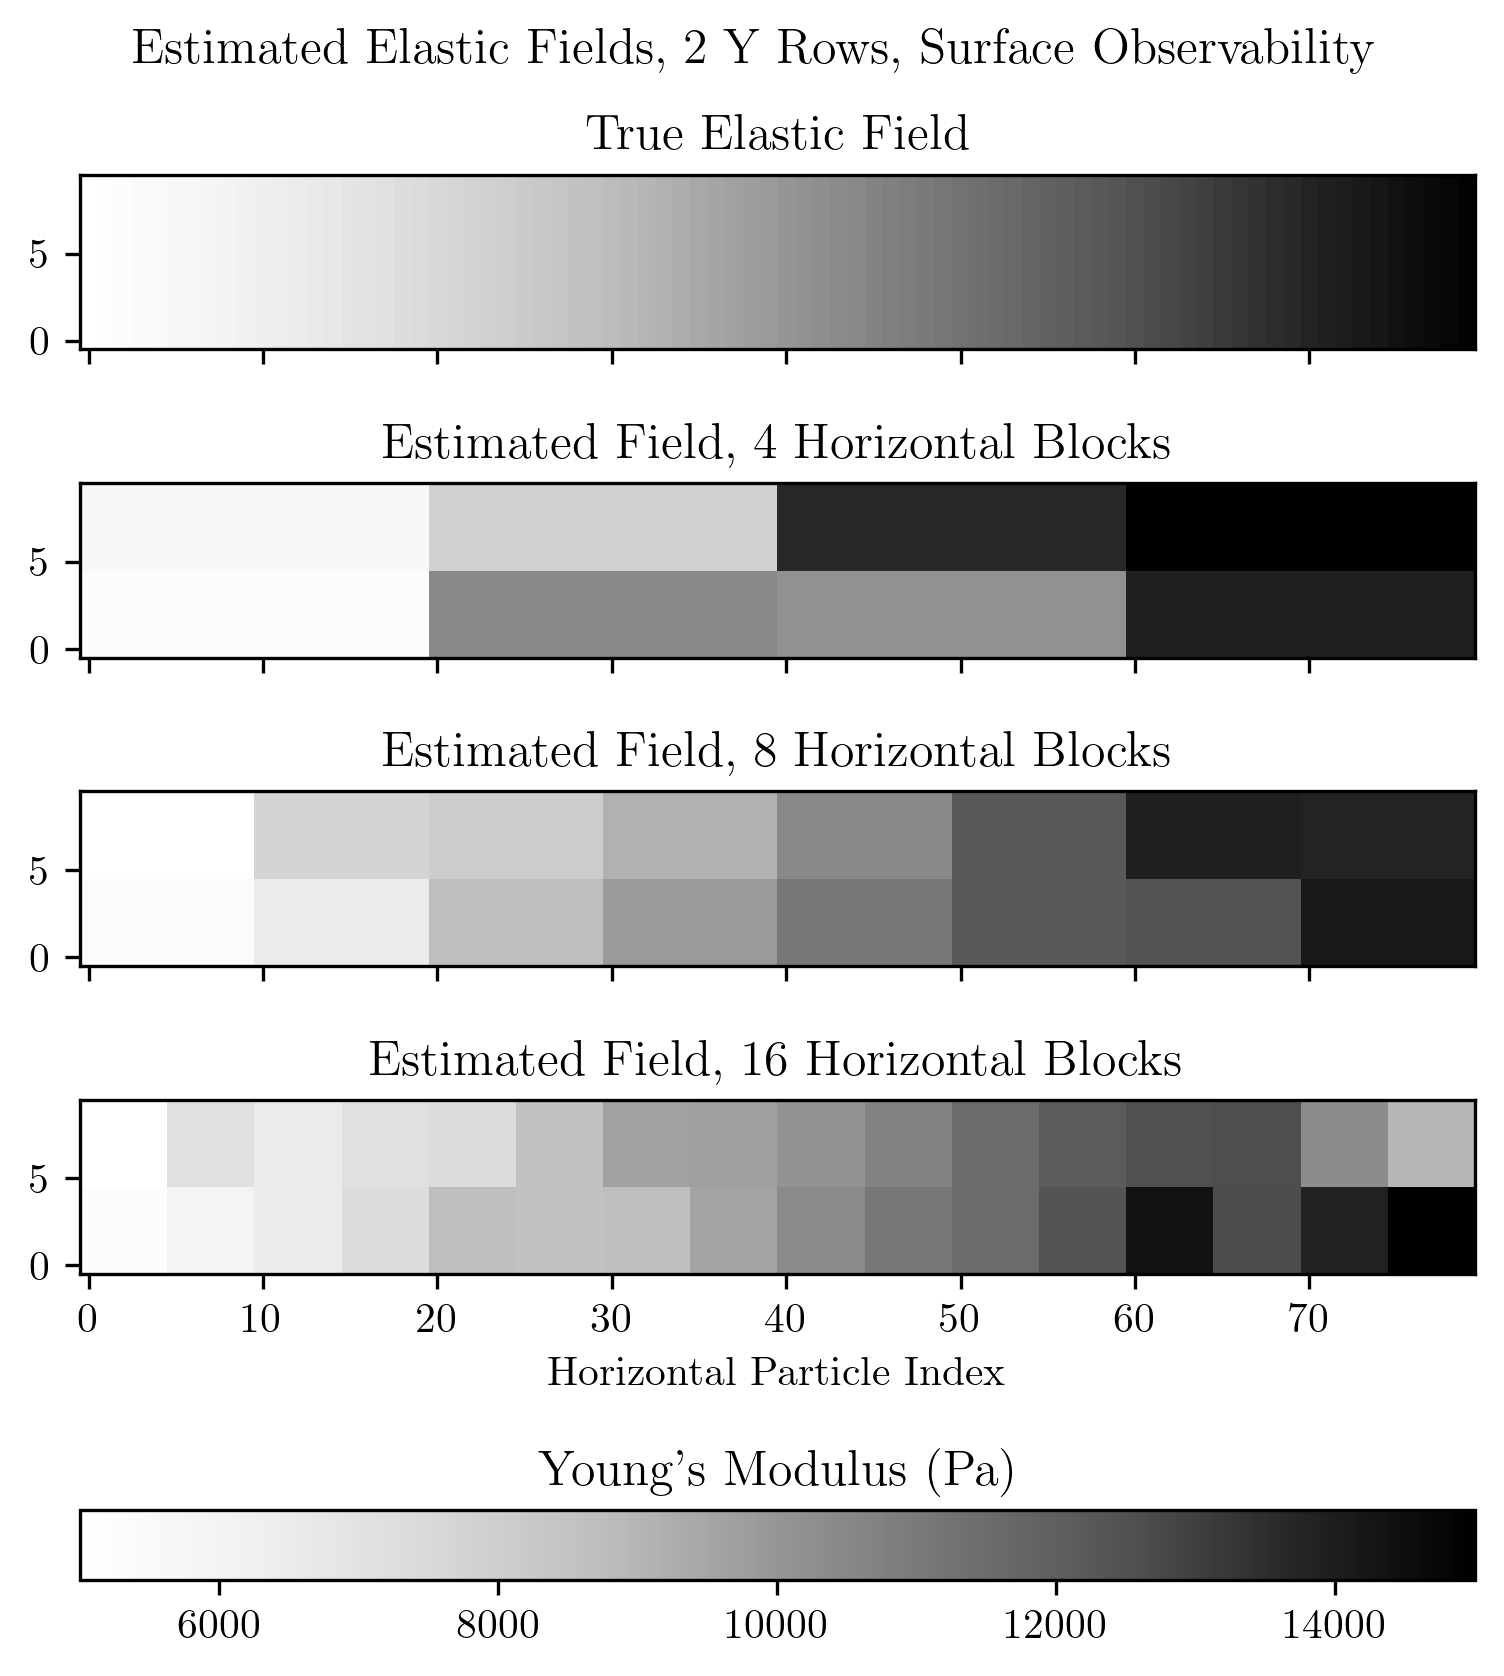

In [4]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 10}
matplotlib.rc('font', **font)


directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [9,13,1,8,12,0,11,15,6,10,14,5]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []

group_index = [
    [0,1,2],
    [3,4,5],
    [6,7,8],
    [9,10,11]
]
group_names = [
    '1 Y Row, Full Observability',
    '1 Y Row, Surface Observability',
    '2 Y Rows, Full Observability',
    '2 Y Rows, Surface Observability'
]

Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)

subplot_titles = [
    'True Elastic Field',
    'Estimated Field, 4 Horizontal Blocks',
    'Estimated Field, 8 Horizontal Blocks',
    'Estimated Field, 16 Horizontal Blocks'
]
for k, group in enumerate(group_index):
    E_hists = []
    results = []
    Es = []
    Es.append(einops.rearrange(E_true, "(y x) -> x y", y=Ny).transpose())
    for index in group:
        with open(filenames[index]) as json_file:
            result = json.load(json_file)['E_hist'][-1]        

        match = re.search(pattern, filenames[index])
        n_blocks_x = int(match.group(1))
        n_blocks_y = int(match.group(2))

        n_blocks = n_blocks_y * n_blocks_x
        block_nx = int(Nx / n_blocks_x)
        block_ny = int(Ny / n_blocks_y)
        E = np.zeros(n_particles)
        for i in range(Nx):
            for j in range(Ny):
                block_index_x = i // block_nx
                block_index_y = j // block_ny
                E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]
        Es.append(einops.rearrange(E, "(y x) -> x y", y=Ny).transpose())

    n_plots = 4
    fig, axs = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(6,7))
    fig.suptitle('Estimated Elastic Fields, ' + group_names[k])
    # fig.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.2)
    images = []
    for i in range(4):
        images.append(axs[i].imshow(Es[i], origin='lower', cmap='Greys', vmin=5000, vmax = 15000))
        axs[i].set_title(subplot_titles[i])
        axs[i].yaxis.set_ticks(np.arange(0, 10, 5))
        
    axs[3].set_xlabel(' Horizontal Particle Index')

    cbar = fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
    cbar.ax.set_title('Young\'s Modulus (Pa)')
    plt.show()

    
    

    


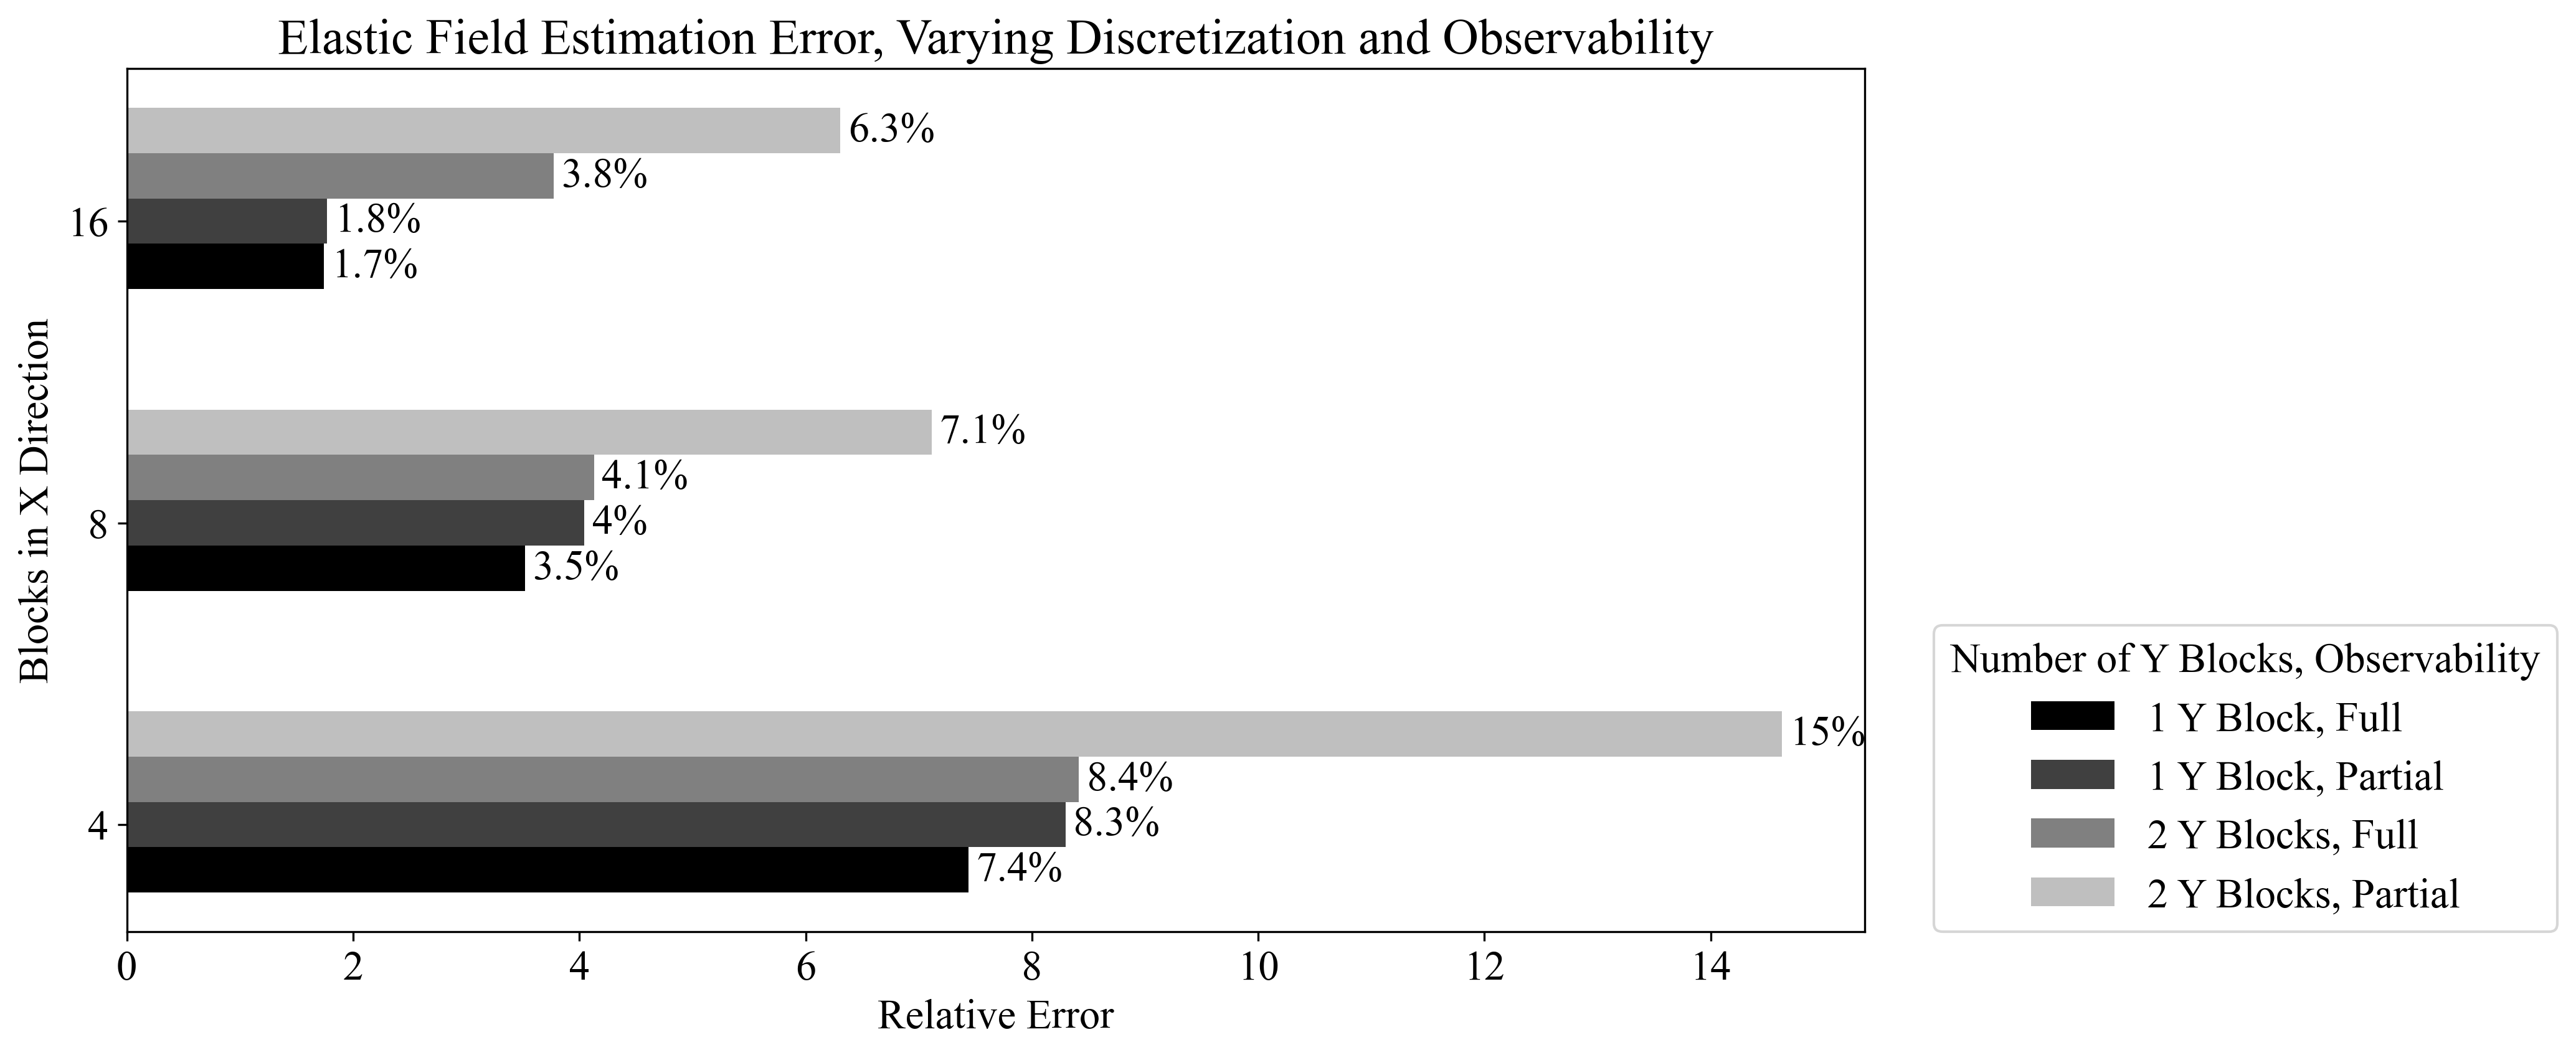

In [9]:
import matplotlib.ticker as mtick
i_1 = [3,4,5]
i_1_full = [0,1,2]
i_2_full = [6,7,8]
i_2 = [9,10,11]

species = ("4", "8", "16")
penguin_means = {
    '1 Y Block, Full': [avg_err[i] for i in i_1_full],
    '1 Y Block, Partial': [avg_err[i] for i in i_1],
    '2 Y Blocks, Full': [avg_err[i] for i in i_2_full],
    '2 Y Blocks, Partial':[avg_err[i] for i in i_2],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(12,6))
fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# ax.xaxis.set_major_formatter(xticks)

def gray(level):
    return (level, level, level)

for j, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.barh(x + offset, np.array(measurement)*100, width, label=attribute, color=gray(j*0.25))
    ax.bar_label(rects, padding=3, fmt='%.2g%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Error')
ax.set_title('Elastic Field Estimation Error, Varying Discretization and Observability')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0), title="Number of Y Blocks, Observability")
# ax.set_ylim(0, 250)
ax.set_ylabel('Blocks in X Direction')
plt.show()

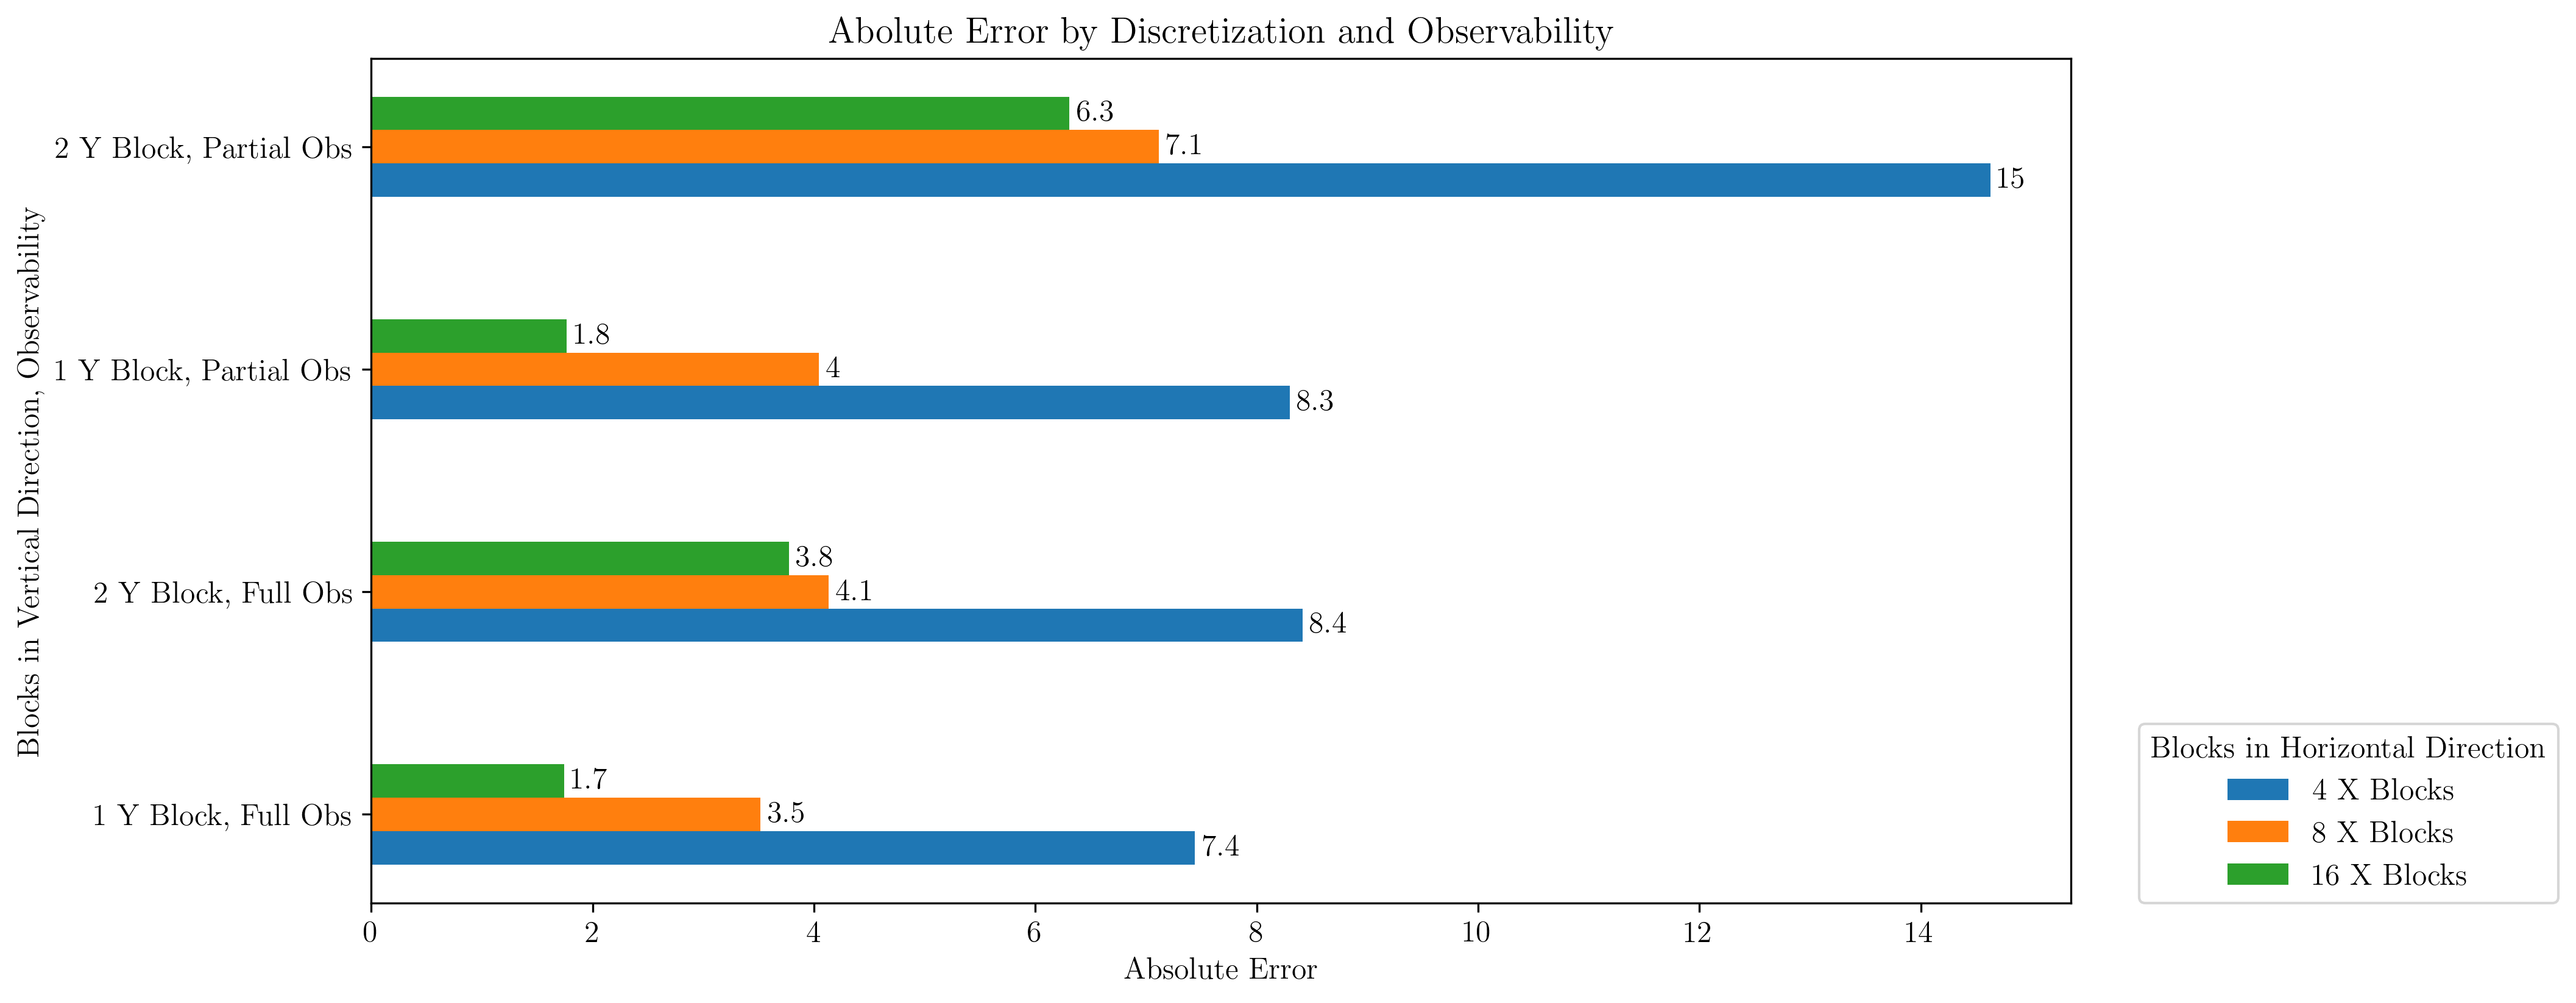

In [3]:
import matplotlib.ticker as mtick
i_4 = [0,6,3,9]
i_8 = [1,7,4,10]
i_16 = [2,8,5,11]


species = (
    "1 Y Block, Full Obs", 
    "2 Y Block, Full Obs", 
    "1 Y Block, Partial Obs",
    "2 Y Block, Partial Obs",
    )
penguin_means = {
    '4 X Blocks': [avg_err[i] for i in i_4],
    '8 X Blocks': [avg_err[i] for i in i_8],
    '16 X Blocks': [avg_err[i] for i in i_16],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,6))
fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, np.array(measurement)*100, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.2g%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Absolute Error')
ax.set_title('Abolute Error by Discretization and Observability')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0), ncols=1, title='Blocks in Horizontal Direction')
# ax.set_ylim(0, 250)
ax.set_ylabel('Blocks in Vertical Direction, Observability')
plt.show()

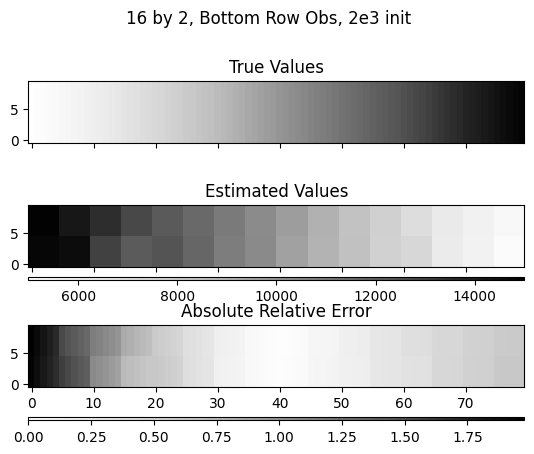

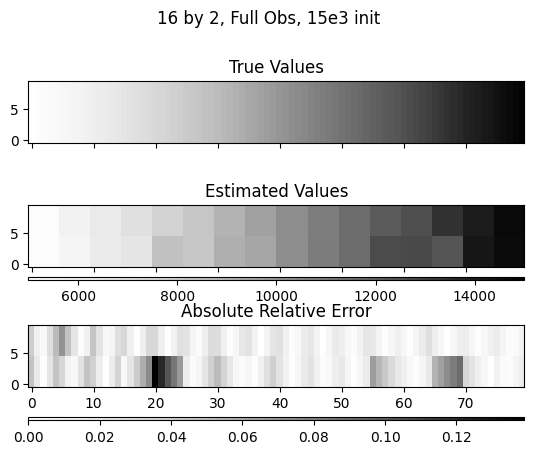

In [ ]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [3,2]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    if name[-14:-10] == "15e3":
        start = "15e3"
    else:
        start = "2e3"

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs + ", " + start + " init")
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    


In [ ]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
filenames

['result_16_1_init_5e3.json',
 'result_16_1_init_5e3_full.json',
 'result_16_2_init_15e3_full.json',
 'result_16_2_init_15e3_full_reverse.json',
 'result_16_2_init_2e3_full.json',
 'result_16_2_init_5e3.json',
 'result_16_2_init_5e3_full.json',
 'result_16_2_init_5e3_full_reverse.json',
 'result_4_1_init_5e3.json',
 'result_4_1_init_5e3_full.json',
 'result_4_2_init_5e3.json',
 'result_4_2_init_5e3_full.json',
 'result_8_1_init_5e3.json',
 'result_8_1_init_5e3_full.json',
 'result_8_2_init_5e3.json',
 'result_8_2_init_5e3_full.json']

In [ ]:
name[-22:-18]

'15e3'

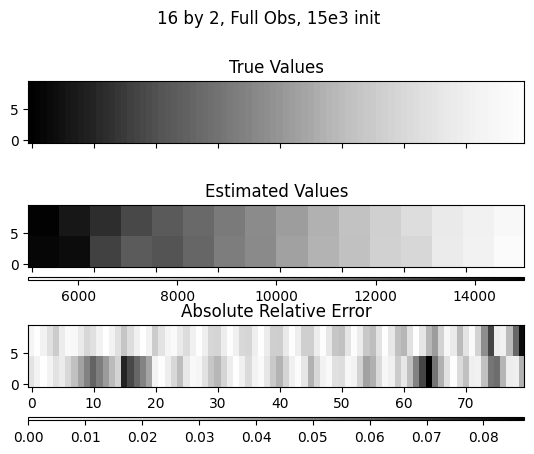

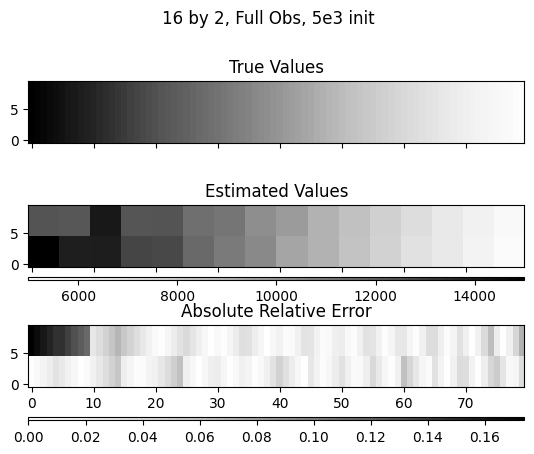

: 

In [ ]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [3,7]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 15000 - 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-17:-13] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    if name[-22:-18] == "15e3":
        start = "15e3"
    else:
        start = "5e3"

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs + ", " + start + " init")
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    


C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_781964\762722416.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(n_plots, sharex=True, sharey=True)


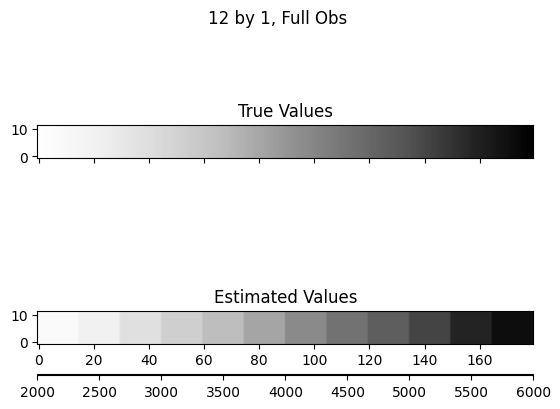

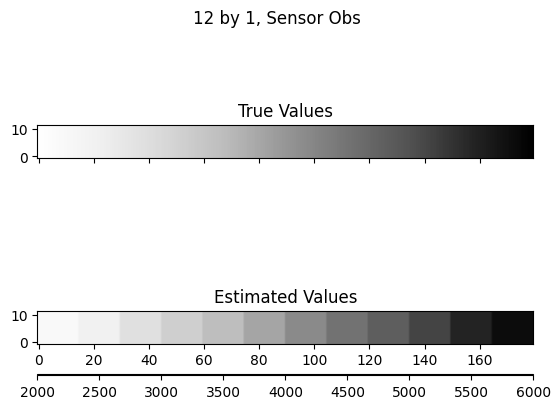

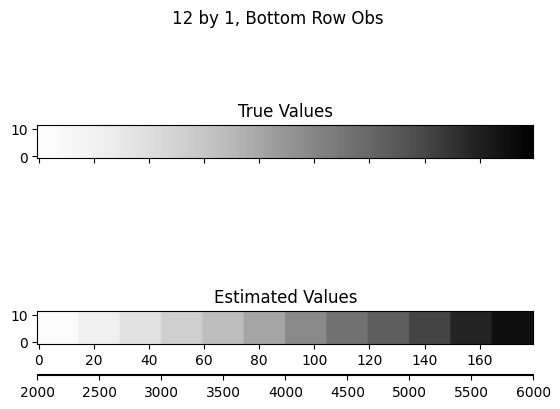

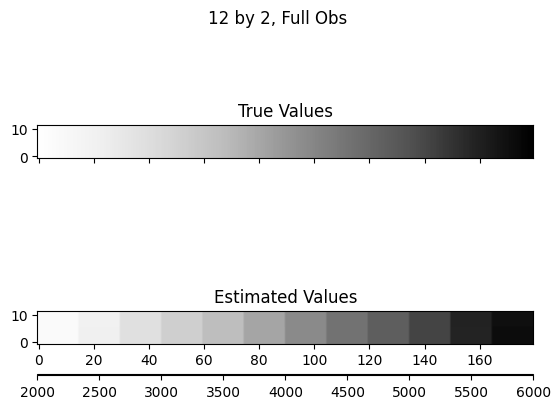

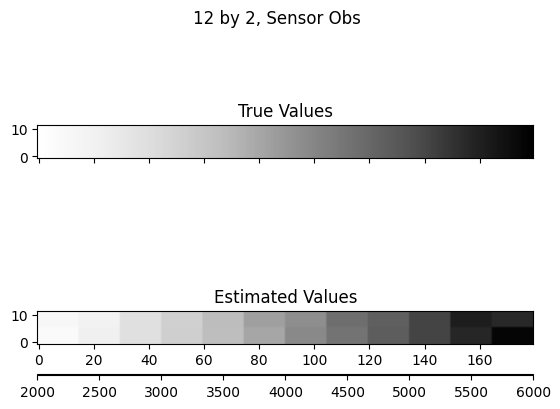

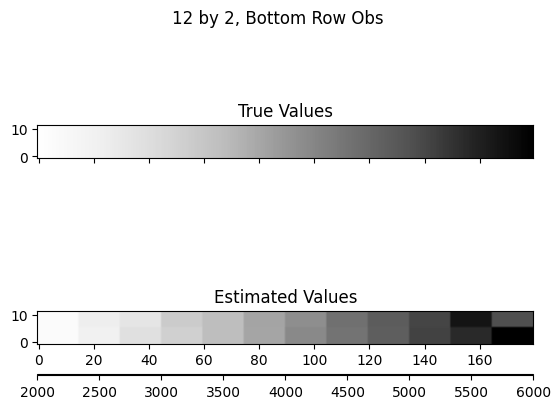

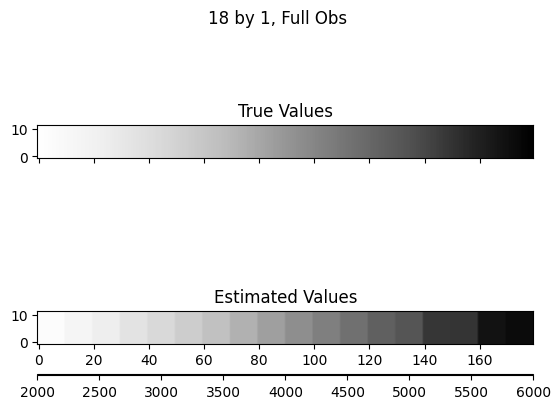

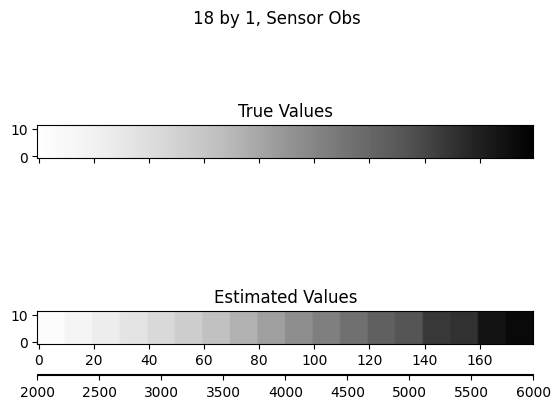

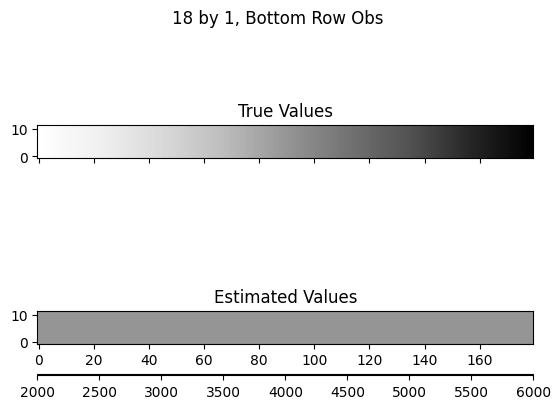

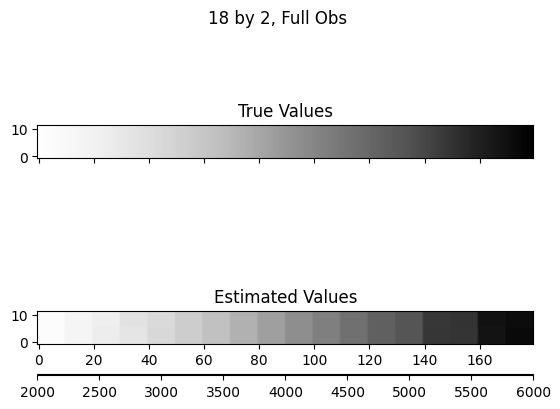

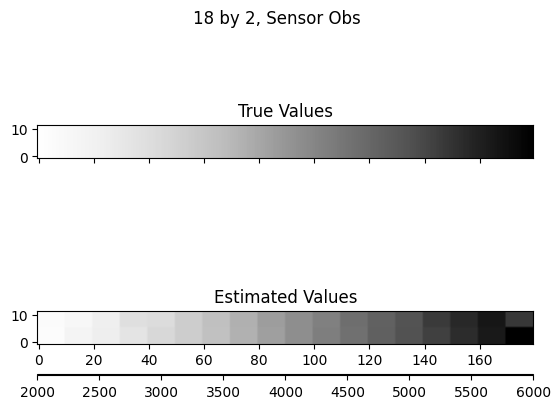

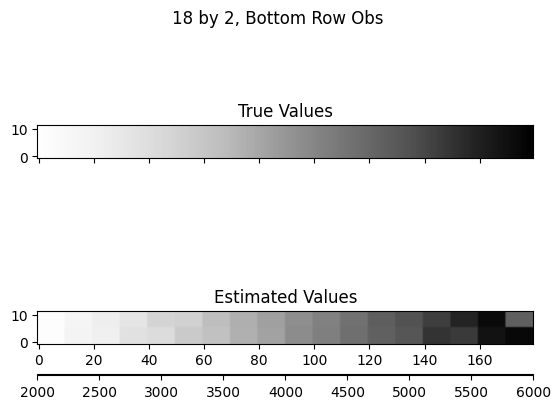

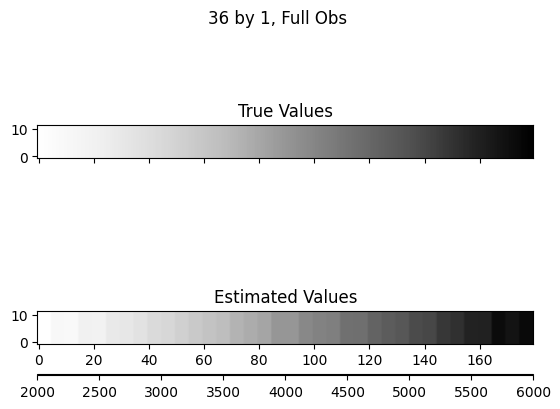

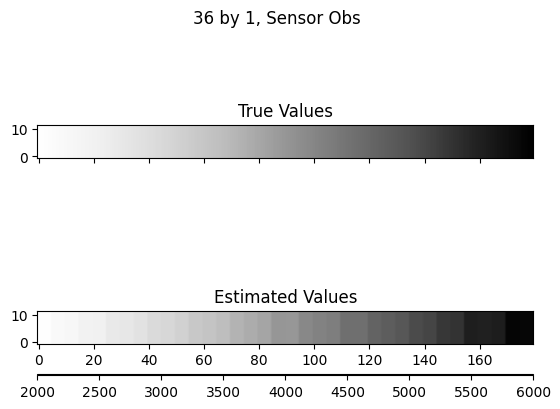

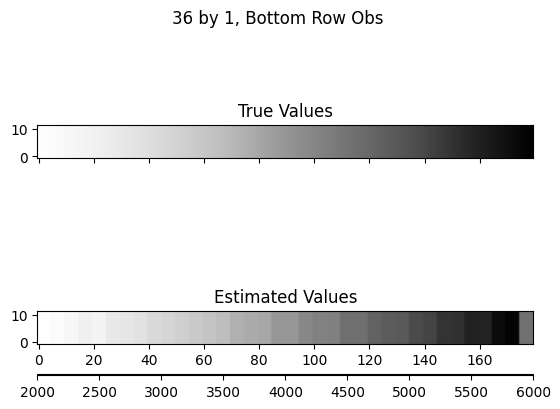

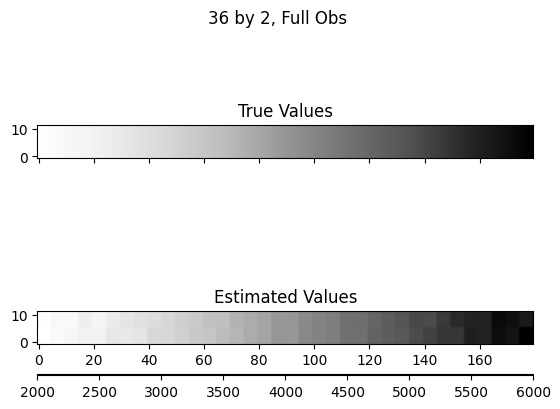

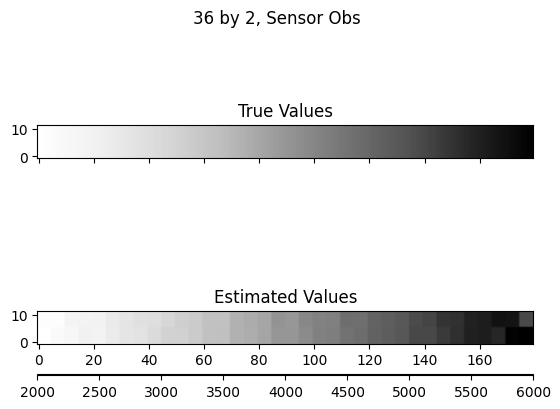

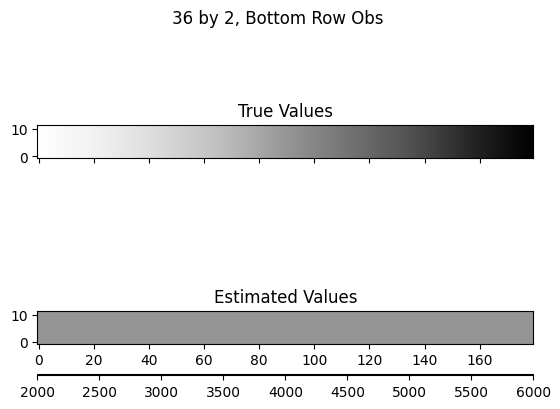

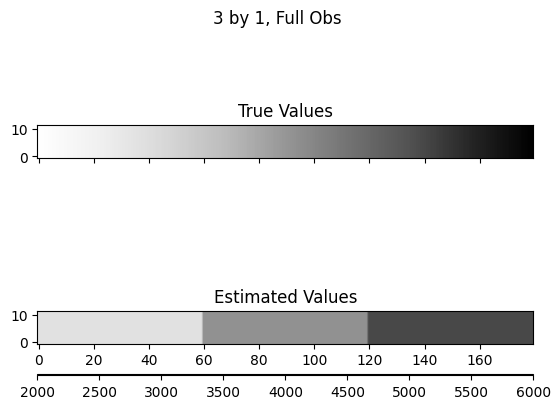

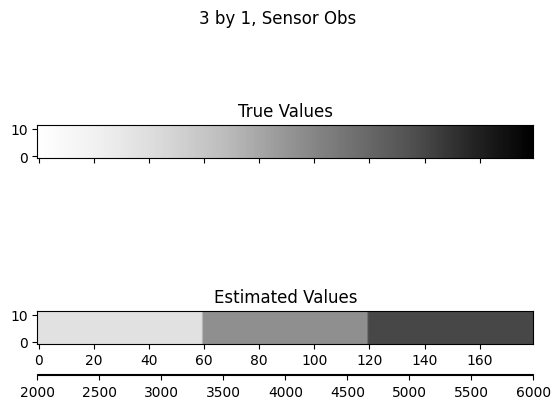

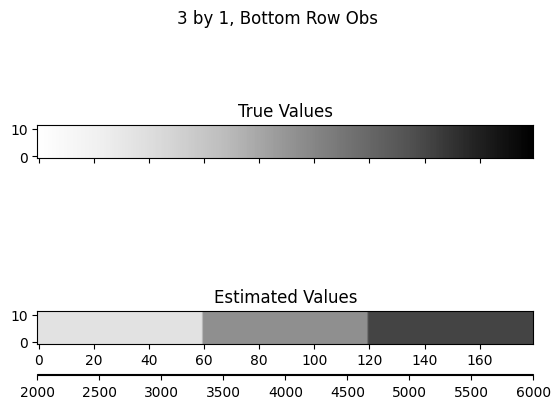

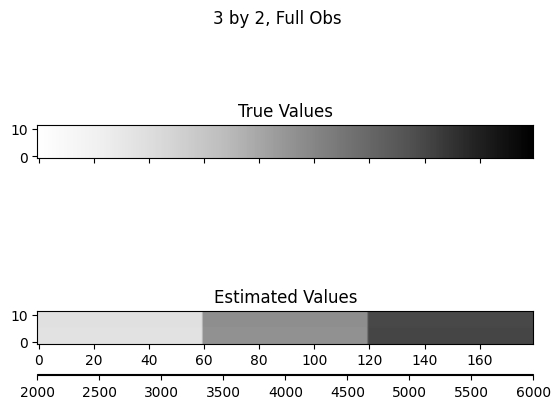

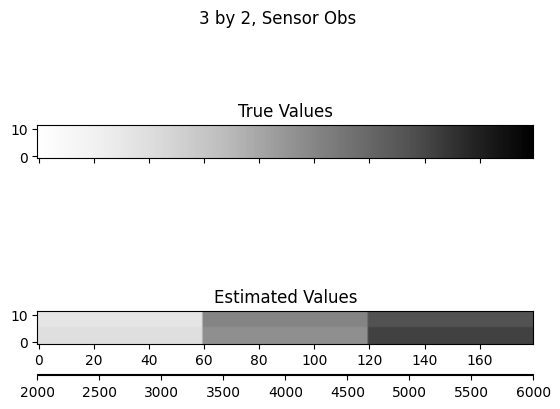

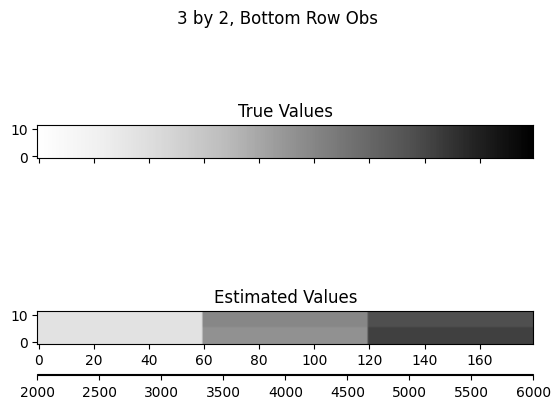

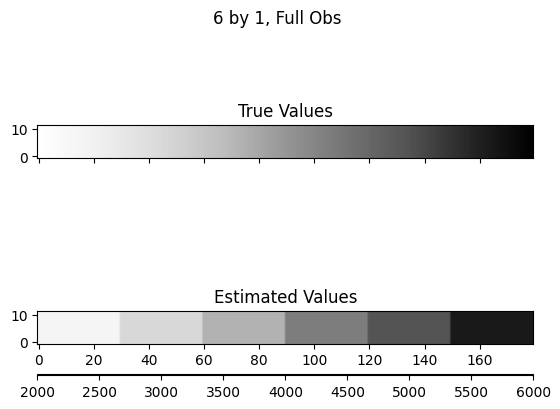

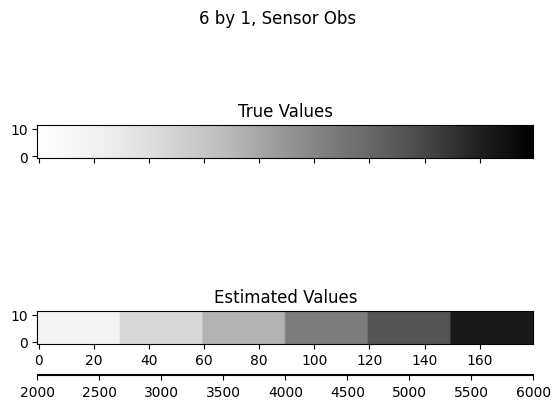

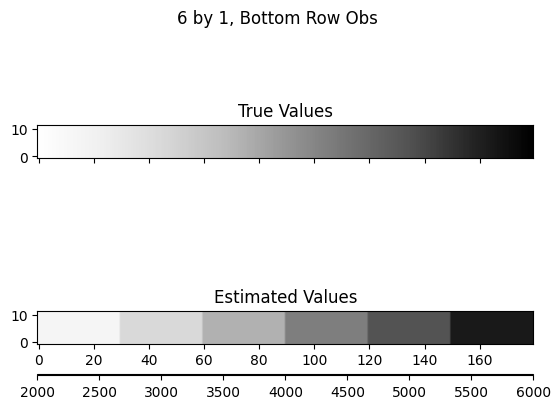

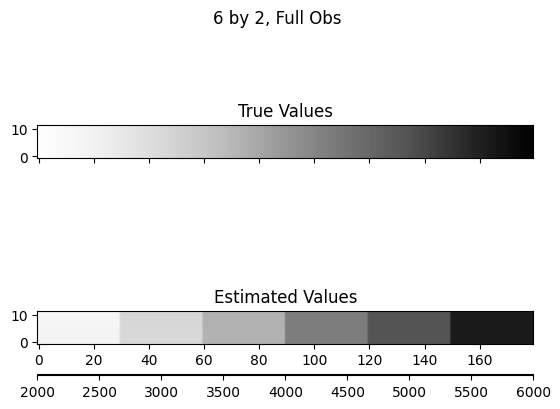

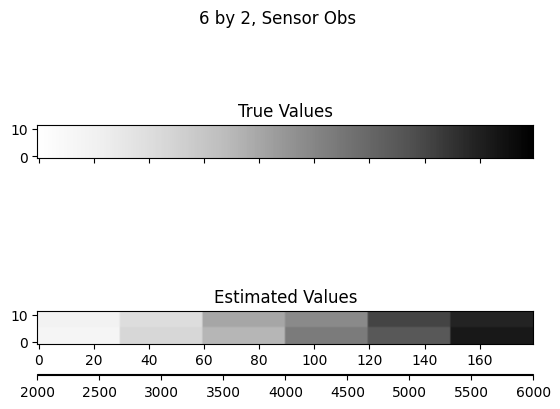

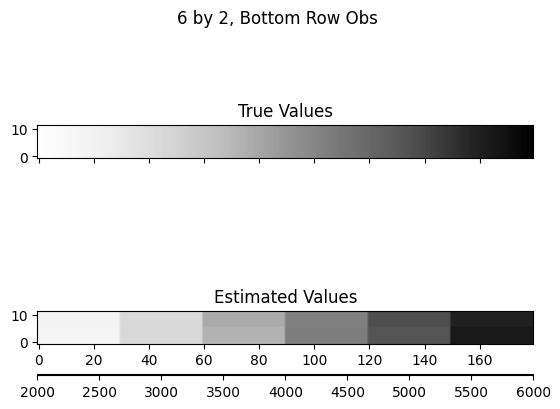

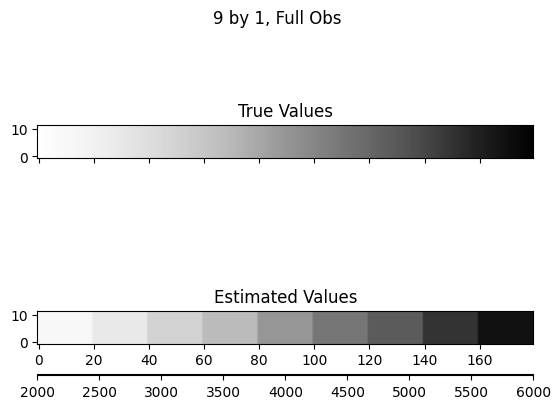

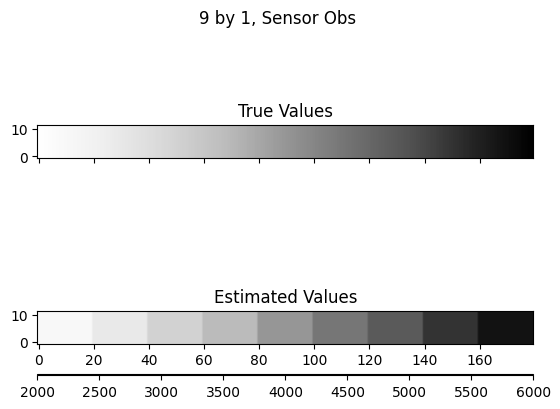

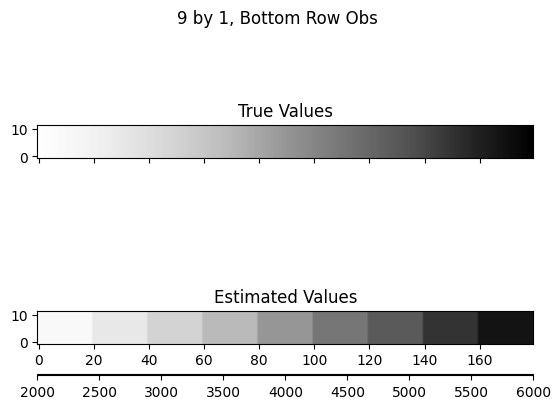

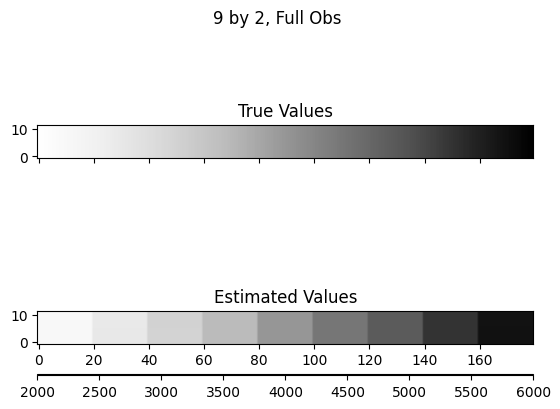

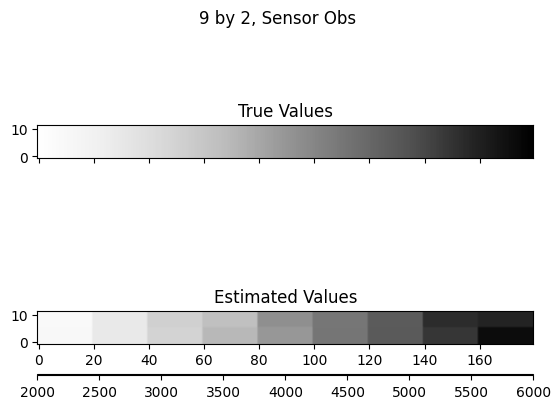

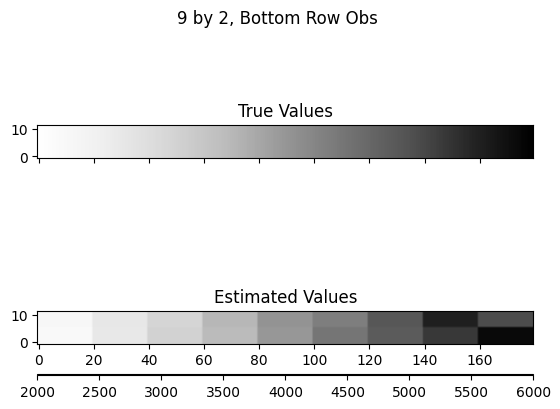

In [1]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.startswith('r_c_')]
pattern = r"r_c_(\d+)_(\d+)_"

E_hists = []
results = []
avg_err = []


Nx = 180
Ny = 12
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 2000 + 4000*(col / Nx)

import matplotlib.pyplot as plt


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    elif name[-8:-5] == 'row':
        obs = 'Sensor Obs'
    else:
        obs = 'Bottom Row Obs'

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    n_plots = 2
    fig, axs = plt.subplots(n_plots, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs)
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=2000, vmax = 6000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=2000, vmax = 6000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    if n_plots == 2:
        pad = 0.3
    else:
        pad = 0.1
    cax1 = divider1.append_axes("bottom", size="5%", pad=pad)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    if n_plots == 3:
        im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
        axs[2].set_title('Absolute Relative Error')
        divider2 = make_axes_locatable(axs[2])
        cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
        fig.colorbar(im2, cax=cax2, orientation='horizontal')
        plt.show()
    

    


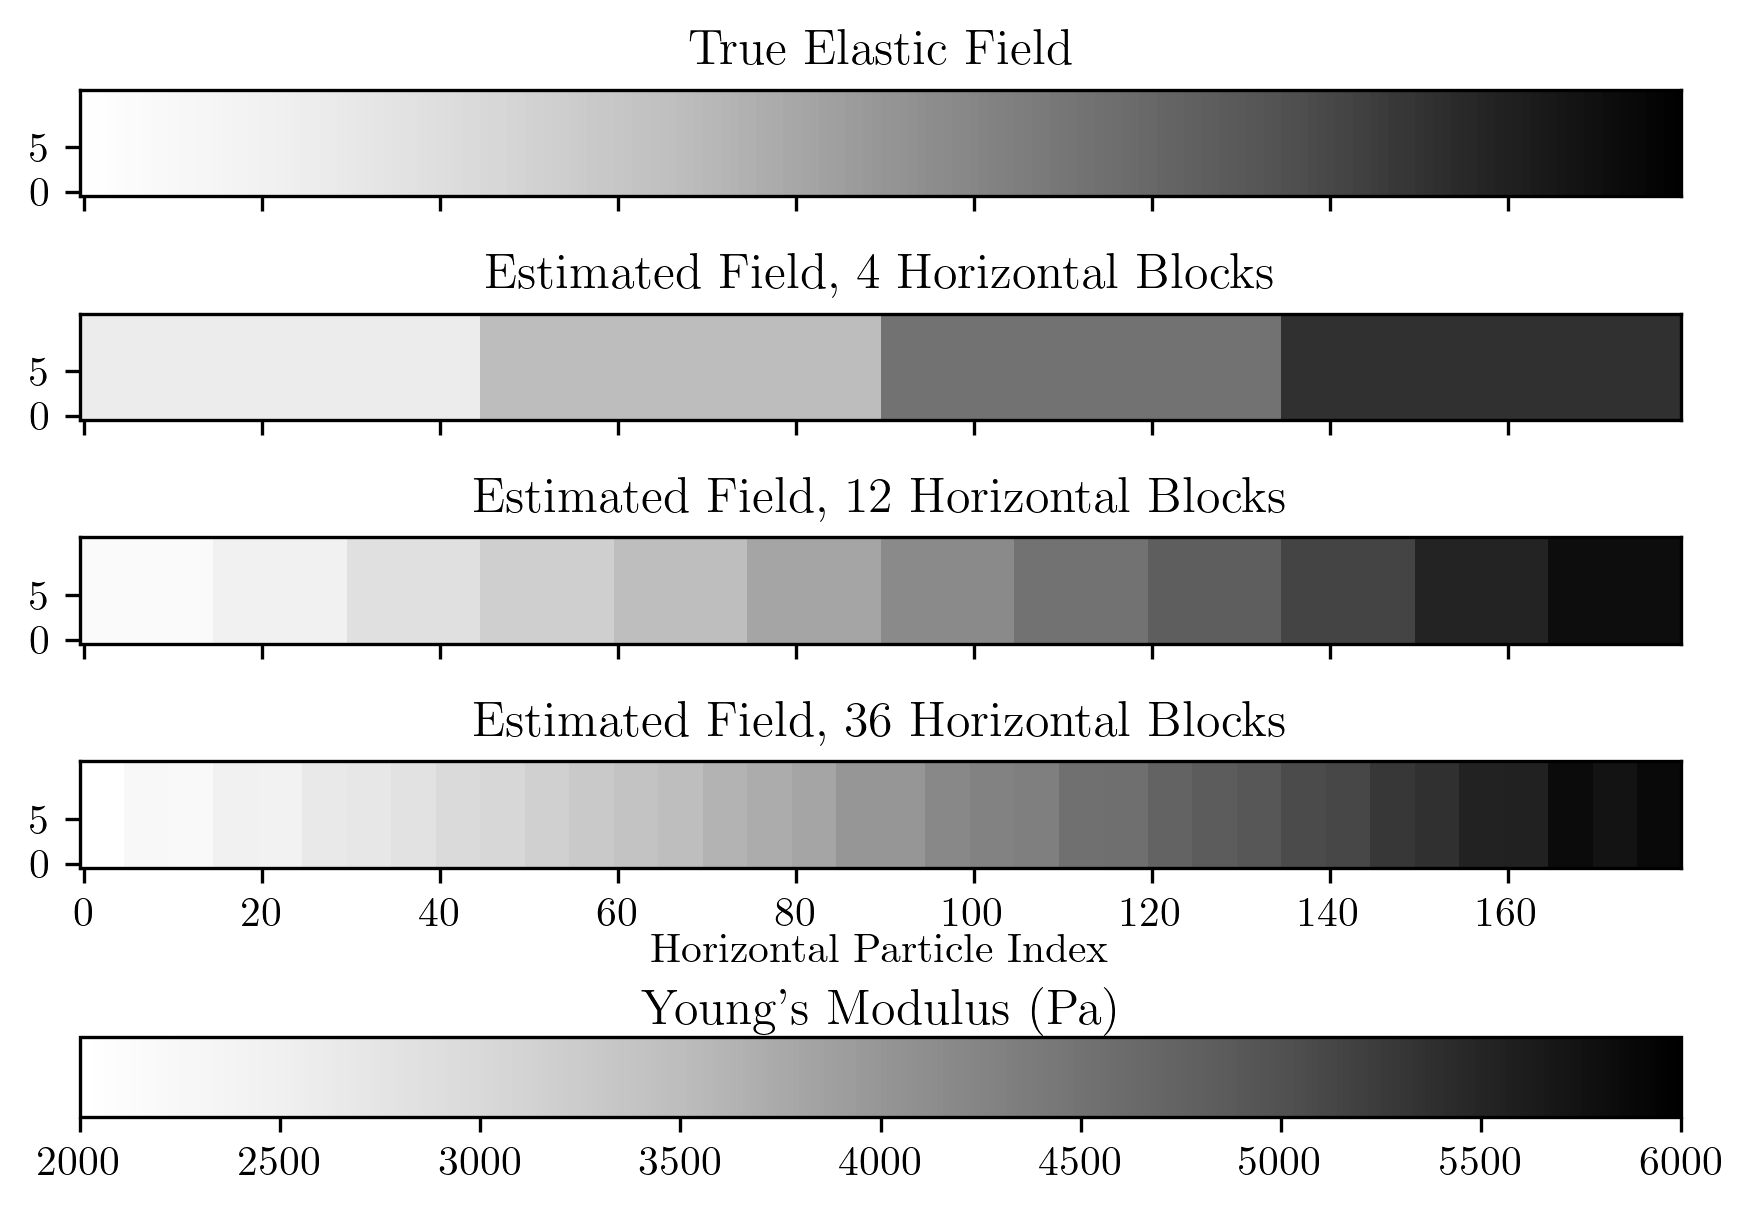

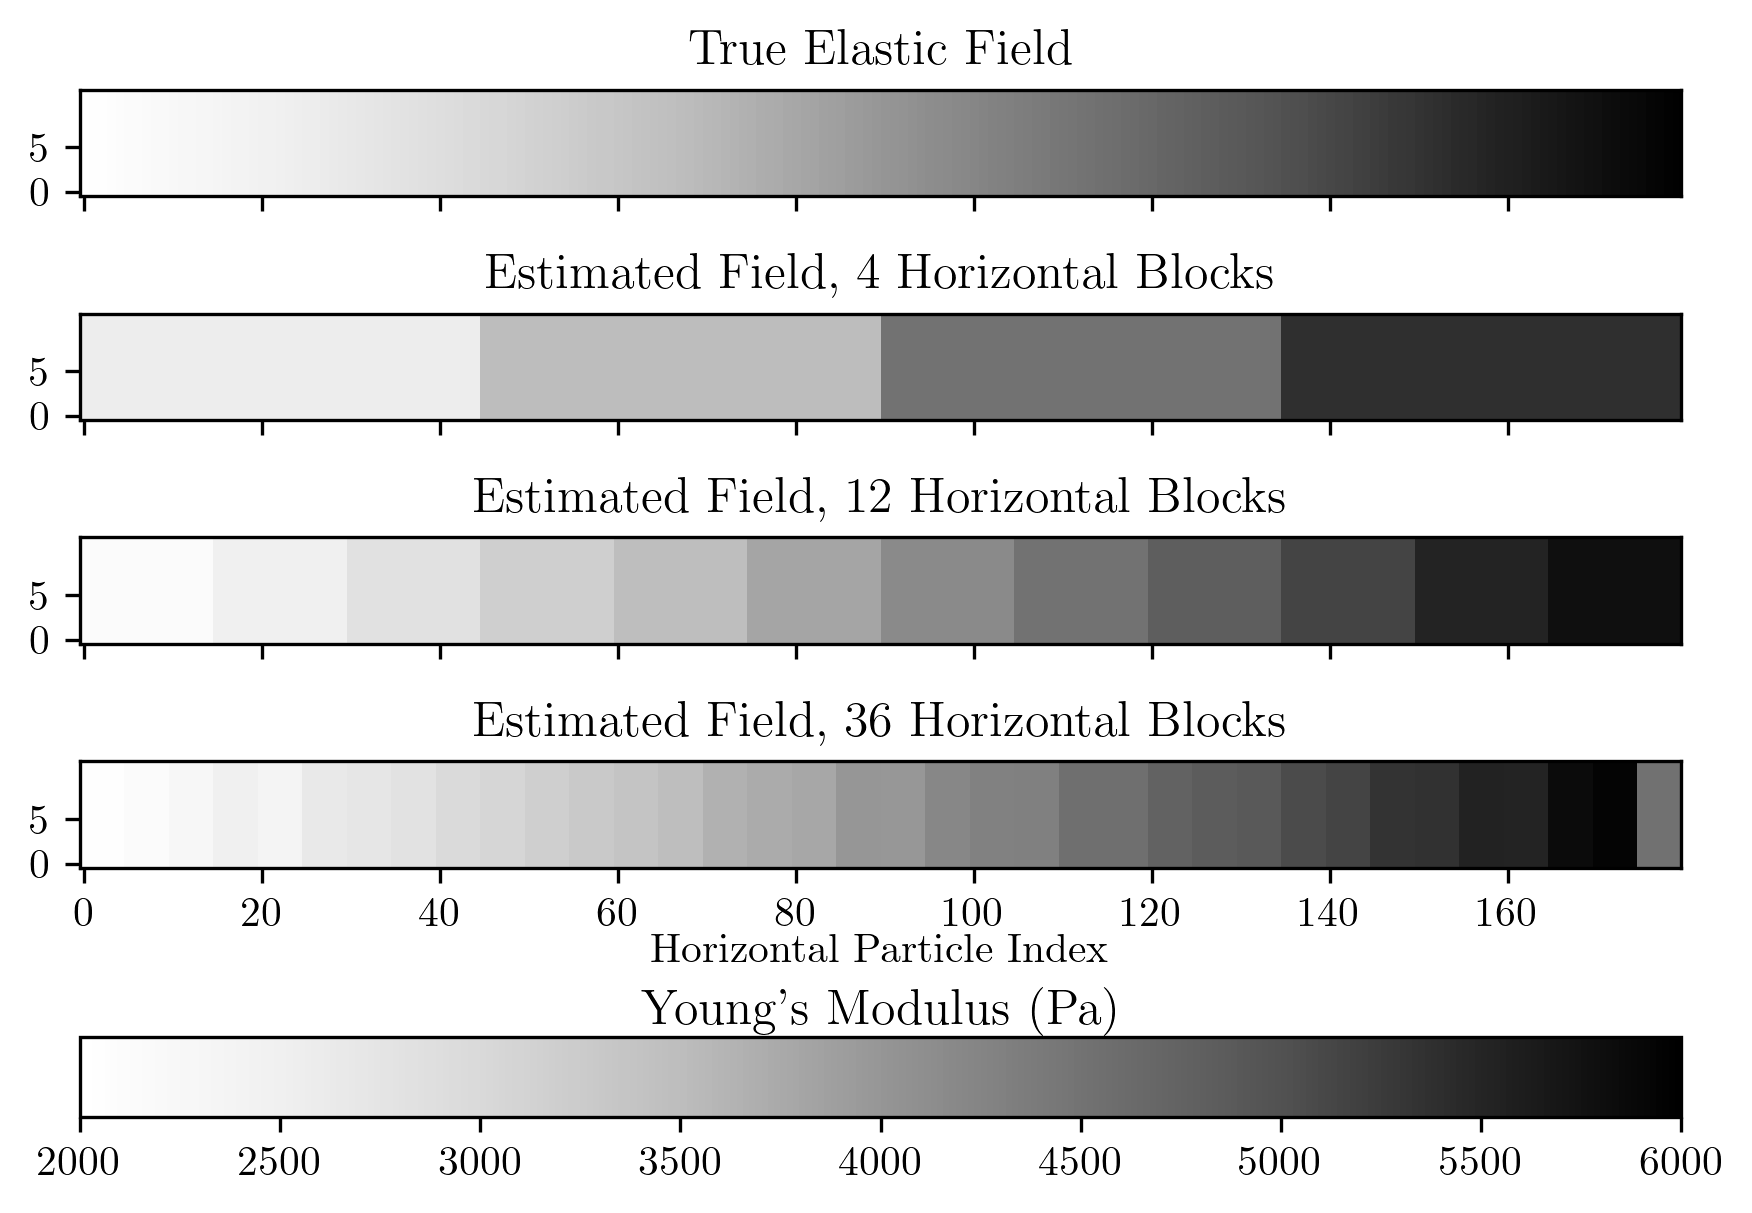

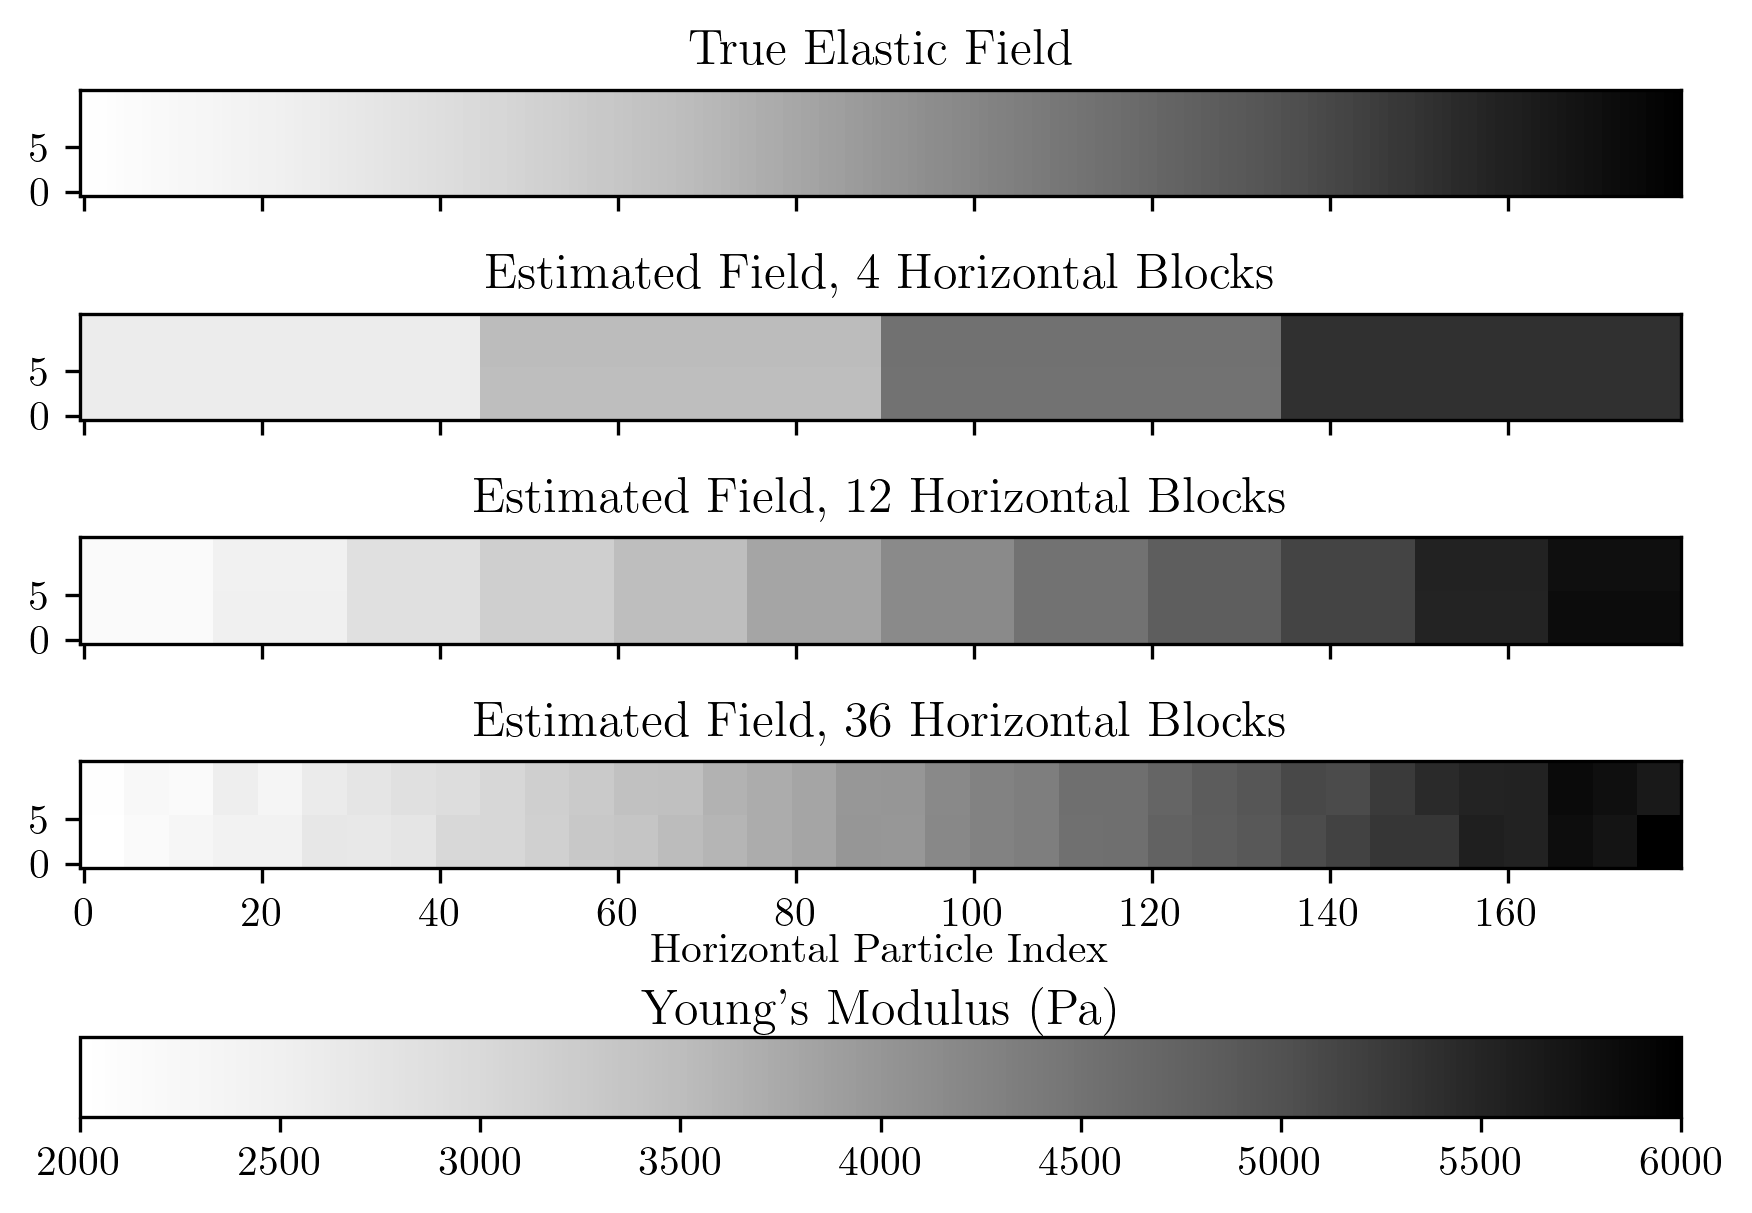

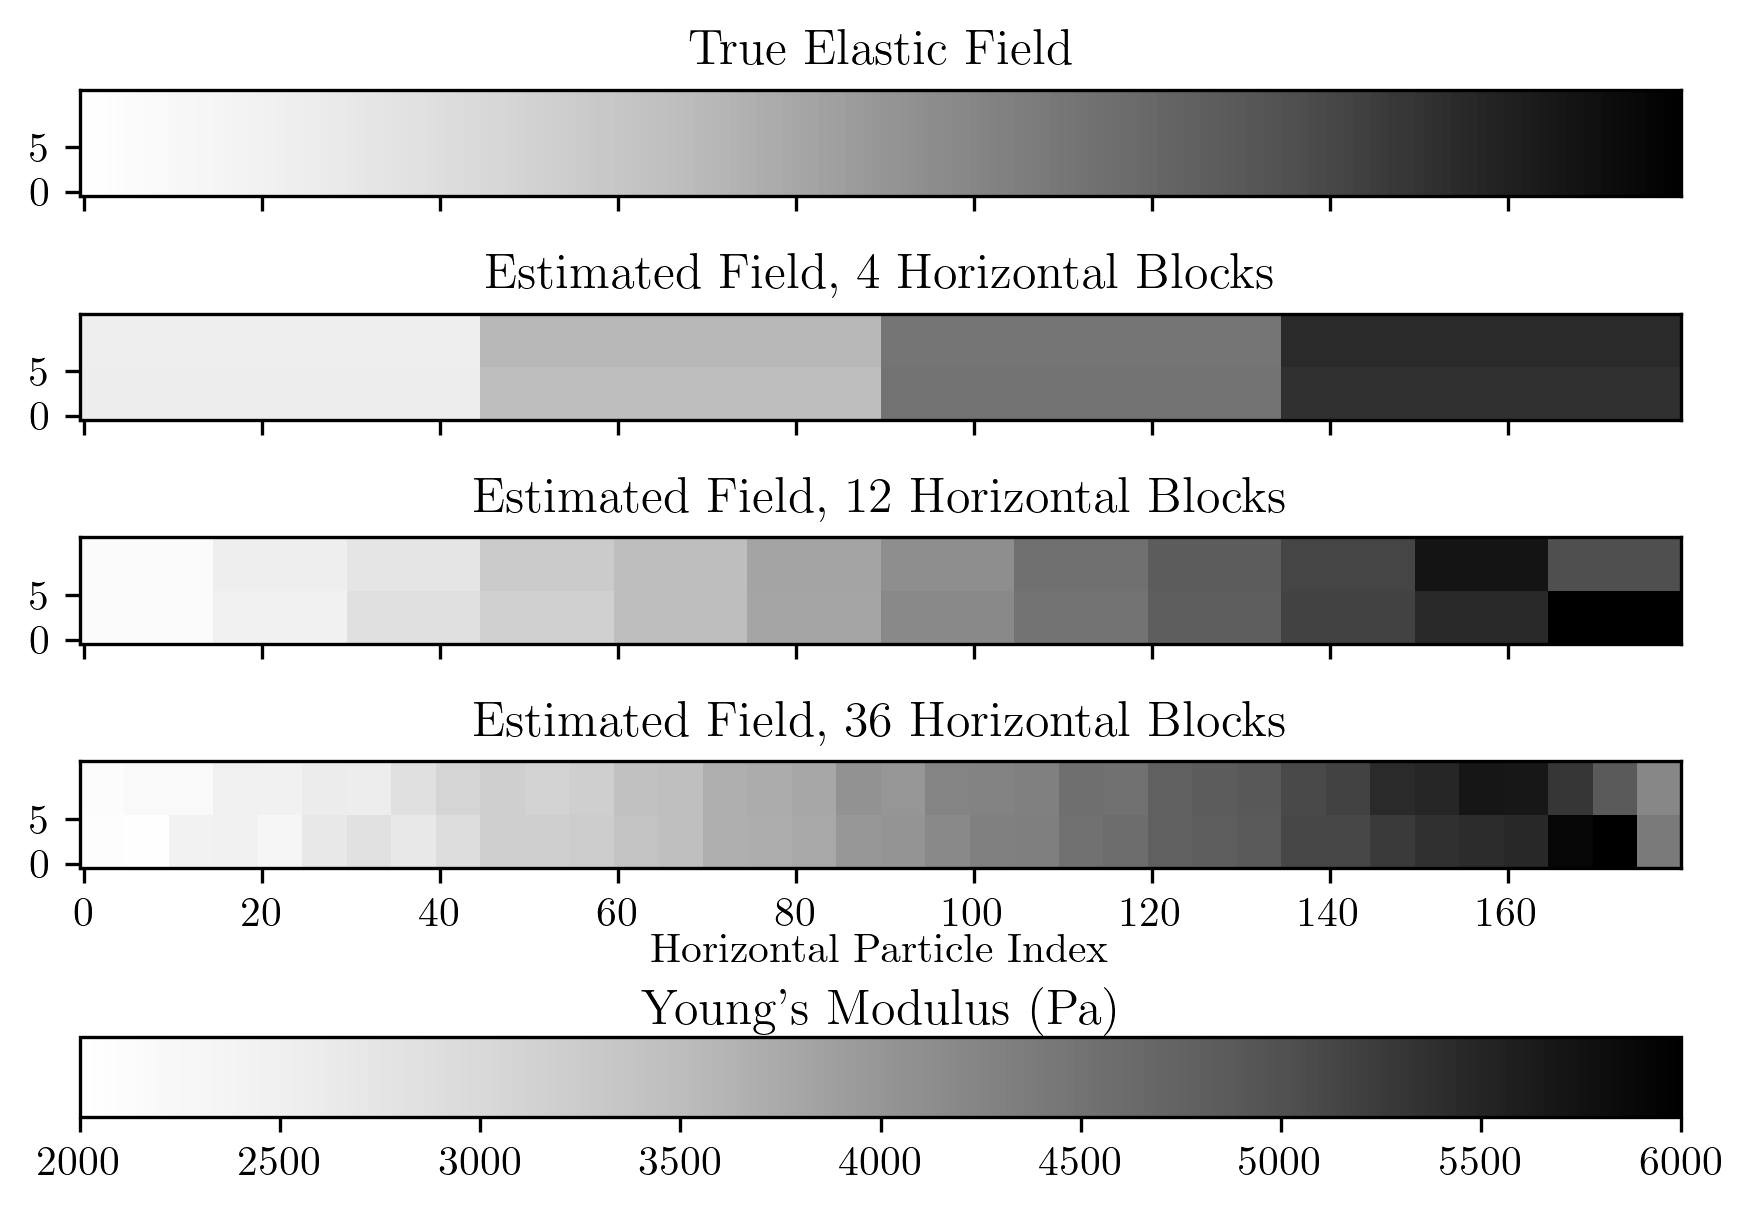

In [9]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 10}
matplotlib.rc('font', **font)


directory_path = "."  # Replace with your desired directory path



E_hists = []
results = []
avg_err = []


group_names = [
    '1 Y Row, Full Observability',
    '1 Y Row, Limited Surface Observability',
    '2 Y Rows, Full Observability',
    '2 Y Rows, Limited Surface Observability'
]

x_blocks = [4, 12, 36]

Nx = 180
Ny = 12
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 2000 + 4000*(col / Nx)

subplot_titles = [
    'True Elastic Field',
    'Estimated Field, 4 Horizontal Blocks',
    'Estimated Field, 12 Horizontal Blocks',
    'Estimated Field, 36 Horizontal Blocks'
]
for k, group in enumerate(group_names):
    E_hists = []
    results = []
    Es = []
    Es.append(einops.rearrange(E_true, "(y x) -> x y", y=Ny).transpose())
    for x_block in x_blocks:
        if "Limited" in group:
            obs = "sensor"
        else:
            obs = "full"
        with open(f"r_c_{x_block}_{group[0]}_{obs}.json") as json_file:
            result = json.load(json_file)['E_hist'][-1]        

        n_blocks_x = x_block
        n_blocks_y = int(group[0])

        n_blocks = n_blocks_y * n_blocks_x
        block_nx = int(Nx / n_blocks_x)
        block_ny = int(Ny / n_blocks_y)
        E = np.zeros(n_particles)
        for i in range(Nx):
            for j in range(Ny):
                block_index_x = i // block_nx
                block_index_y = j // block_ny
                E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]
        Es.append(einops.rearrange(E, "(y x) -> x y", y=Ny).transpose())

    n_plots = 4
    fig, axs = plt.subplots(n_plots, sharex=True, sharey=True, figsize=(6,5))
    # fig.suptitle('Estimated Elastic Fields, ' + group_names[k])
    fig.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.2)
    images = []
    for i in range(4):
        images.append(axs[i].imshow(Es[i], origin='lower', cmap='Greys', vmin=2000, vmax = 6000))
        axs[i].set_title(subplot_titles[i])
        axs[i].yaxis.set_ticks(np.arange(0, 10, 5))
        
    axs[3].set_xlabel(' Horizontal Particle Index', labelpad=0)

    cbar = fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
    cbar.ax.set_title('Young\'s Modulus (Pa)', pad=0)
    plt.show()

    
    

    


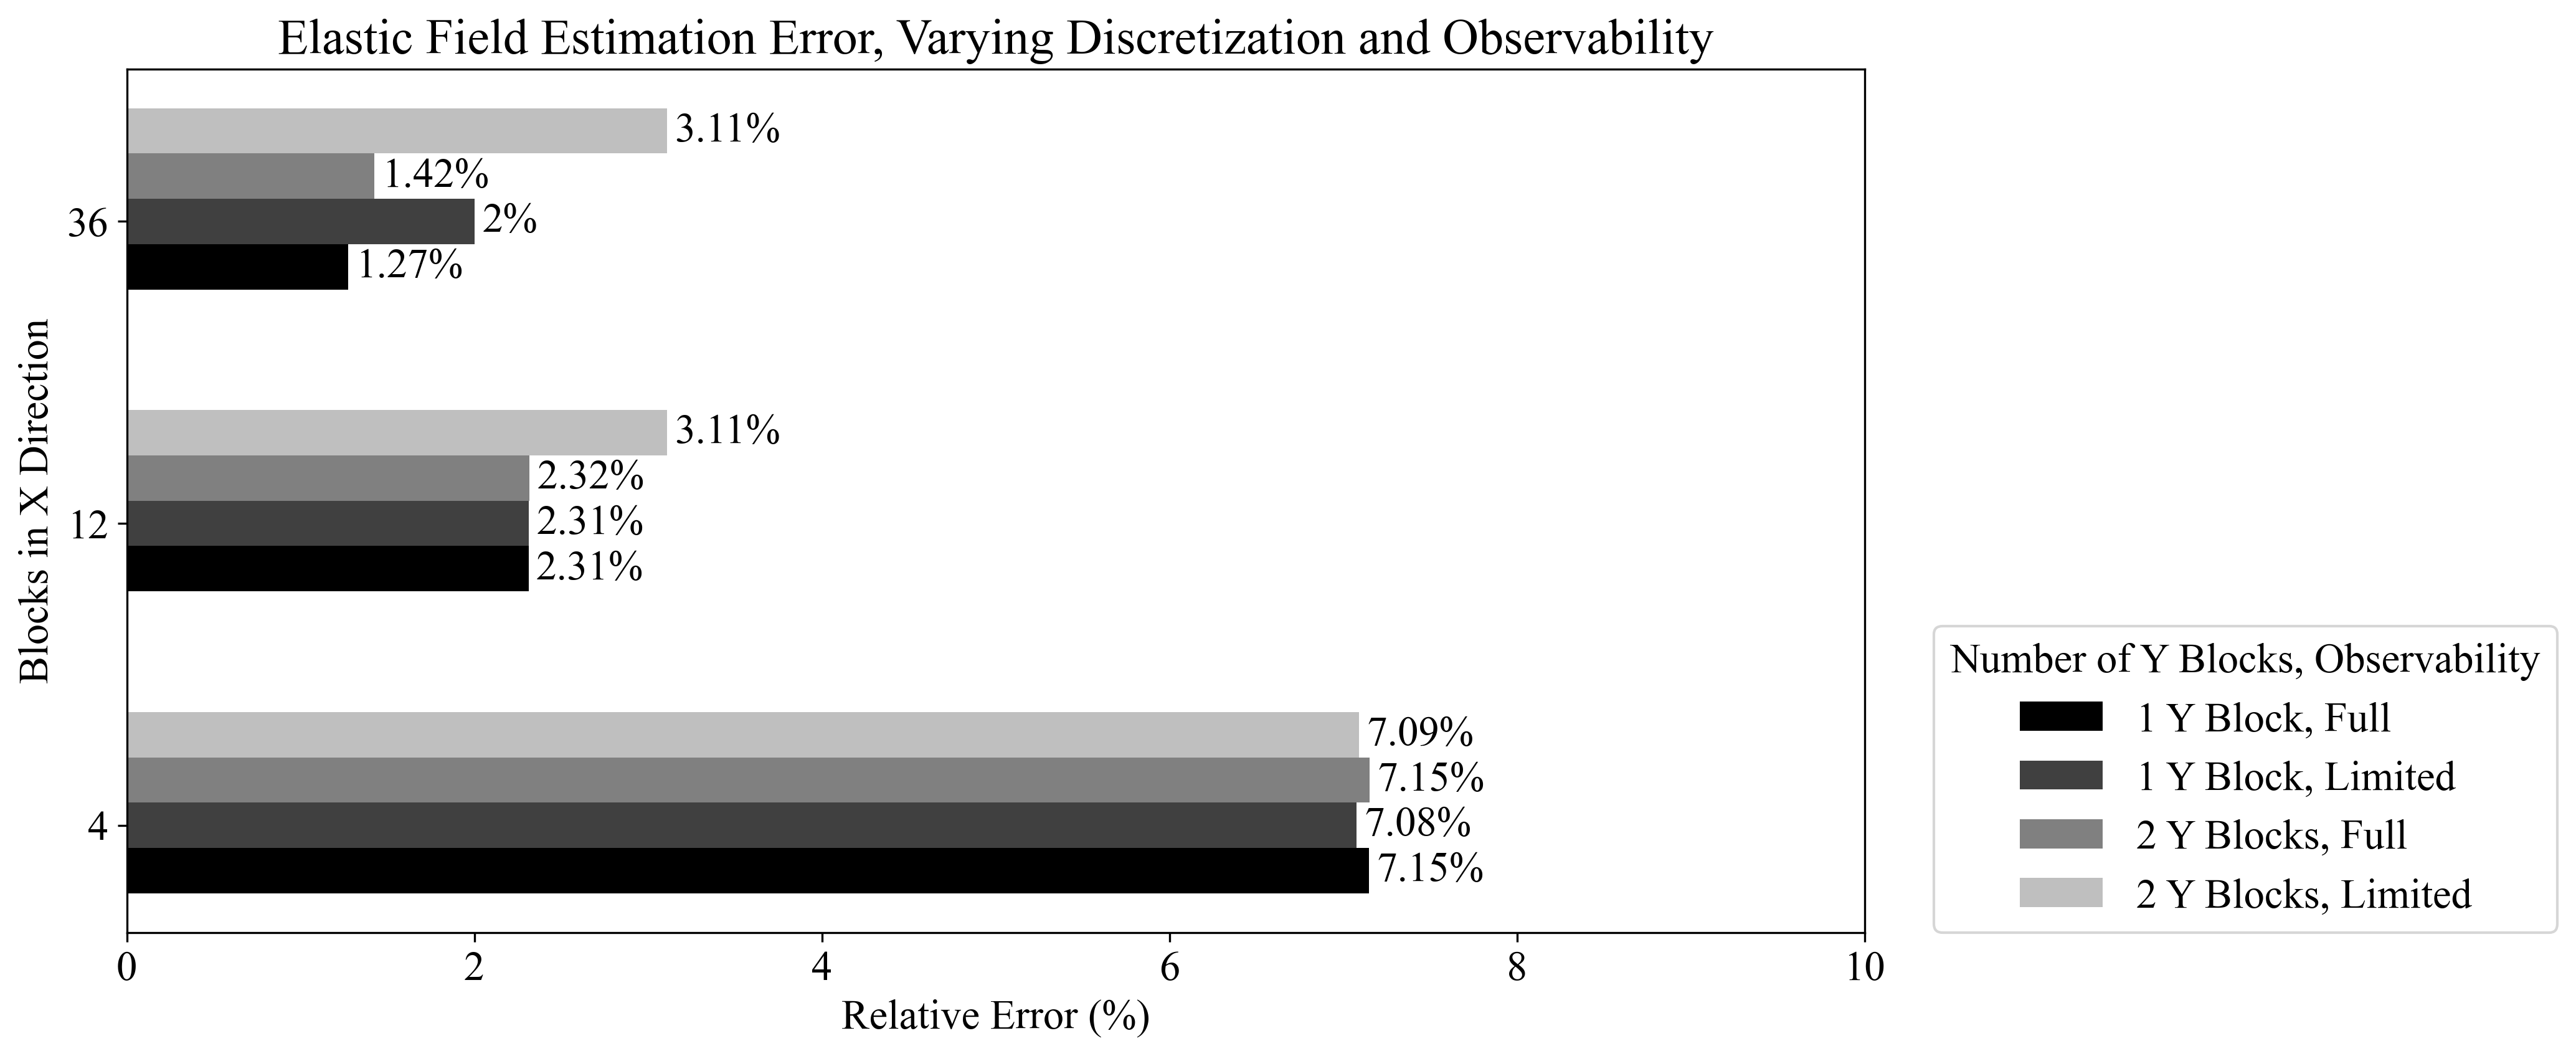

In [20]:
import matplotlib.ticker as mtick

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 2000 + 4000*(col / Nx)

import matplotlib.pyplot as plt

def err_calc(x_block, y_block, obs):
    name = f"r_c_{x_block}_{y_block}_{obs}.json"
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    n_blocks_x = x_block
    n_blocks_y = y_block

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)
    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    return np.mean(error.flatten())

group_names = [
    '1 Y Row, Full Observability',
    '1 Y Row, Limited Surface Observability',
    '2 Y Rows, Full Observability',
    '2 Y Rows, Limited Surface Observability'
]

x_blocks = [4, 12, 36]
species = ("4", "12", "36")
penguin_means = {
    '1 Y Block, Full': [err_calc(x_block, 1, "full") for x_block in x_blocks],
    '1 Y Block, Limited': [err_calc(x_block, 1, "sensor") for x_block in x_blocks],
    '2 Y Blocks, Full': [err_calc(x_block, 2, "full") for x_block in x_blocks],
    '2 Y Blocks, Limited':[err_calc(x_block, 2, "sensor") for x_block in x_blocks],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

import matplotlib.pyplot as plt
import matplotlib
plt.rcdefaults()
# matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(12,6))
fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# ax.xaxis.set_major_formatter(xticks)

def gray(level):
    return (level, level, level)

for j, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.barh(x + offset, np.array(measurement)*100, width, label=attribute, color=gray(j*0.25))
    ax.bar_label(rects, padding=3, fmt='%.3g%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Error (%)')
ax.set_title('Elastic Field Estimation Error, Varying Discretization and Observability')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0), title="Number of Y Blocks, Observability")
ax.set_xlim(0, 10)
ax.set_ylabel('Blocks in X Direction')
plt.show()